In [192]:
# Import Libraries
import nolds
import pywt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.feature_selection import f_classif
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [193]:
pd.set_option('display.max_columns', 50)

### Importing Data

In [194]:
subject = 6 # subject can be 1, 3, 4 or 6

In [195]:
# column_names

column_names = ['Time_stamp', 'FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'P7', 'P8', 'FZ', 'CZ', 'PZ', 'FC1', 'FC2',
                'CP1', 'CP2', 'FC5', 'FC6', 'CP5', 'CP6', 'R_TA', 'L_TA', 'IO', 'ECG', 'R_GS', 'l_shank_acc_x', 'l_shank_acc_y', 'l_shank_acc_z',
                'l_shank_gyro_x', 'l_shank_gyro_y', 'l_shank_gyro_z', 'l_shank_nc/sc', 'r_shank_acc_x', 'r_shank_acc_y', 'r_shank_acc_z',
                'r_shank_gyro_x', 'r_shank_gyro_y', 'r_shank_gyro_z', 'r_shank_nc/sc', 'waist_acc_x', 'waist_acc_y', 'waist_acc_z', 'waist_gyro_x',
                'waist_gyro_y', 'waist_gyro_z', 'waist_nc/sc', 'arm_acc_x', 'arm_acc_y', 'arm_acc_z', 'arm_gyro_x', 'arm_gyro_y', 'arm_gyro_z',
                 'arm_nc/sc', 'Labels']

In [196]:
# Import Data

if subject == 4:
    task_01 = pd.read_csv(f'subject{subject}/task_1.txt', names = column_names)
    task_02 = pd.read_csv(f'subject{subject}/task_2.txt', names = column_names)
    task_03 = pd.read_csv(f'subject{subject}/task_3.txt', names = column_names)
    task_04 = pd.read_csv(f'subject{subject}/task_4.txt', names = column_names)
    task_05 = pd.read_csv(f'subject{subject}/task_5.txt', names = column_names)

else:
    task_01 = pd.read_csv(f'subject{subject}/task_1.txt', names = column_names)
    task_02 = pd.read_csv(f'subject{subject}/task_2.txt', names = column_names)
    task_03 = pd.read_csv(f'subject{subject}/task_3.txt', names = column_names)
    task_04 = pd.read_csv(f'subject{subject}/task_4.txt', names = column_names)

In [197]:
# Drop irrelevant columns

if subject == 1:
    drop_columns = ['Time_stamp', 'l_shank_nc/sc', 'r_shank_acc_x', 'r_shank_acc_y', 'r_shank_acc_z', 'r_shank_gyro_x', 'r_shank_gyro_y',
                   'r_shank_gyro_z', 'r_shank_nc/sc', 'waist_nc/sc']
    tasks = [task_01, task_02, task_03, task_04]
    for task in tasks:
        task.drop(columns = drop_columns, axis = 1, inplace = True)

# elif subject == 2:    # This patient has no FoG detections at all, so it is excluded.
#     drop_columns = ['Time_stamp', 'l_shank_acc_x', 'l_shank_acc_y', 'l_shank_acc_z', 'l_shank_gyro_x', 'l_shank_gyro_y', 'l_shank_gyro_z',
#                     'l_shank_nc/sc', 'r_shank_nc/sc', 'waist_nc/sc', 'arm_acc_x', 'arm_acc_y', 'arm_acc_z', 'arm_gyro_x', 'arm_gyro_y',
#                     'arm_gyro_z', 'arm_nc/sc']
#     tasks = [task_01, task_02, task_03, task_04]
#     for task in tasks:
#         task.drop(columns = drop_columns, axis = 1, inplace = True)

elif subject == 3:
    drop_columns = ['Time_stamp', 'l_shank_nc/sc', 'r_shank_acc_x', 'r_shank_acc_y', 'r_shank_acc_z', 'r_shank_gyro_x', 'r_shank_gyro_y',
                   'r_shank_gyro_z', 'r_shank_nc/sc', 'waist_nc/sc']
    tasks = [task_01, task_02, task_03, task_04]
    for task in tasks:
        task.drop(columns = drop_columns, axis = 1, inplace = True)

elif subject == 4:
    drop_columns = ['Time_stamp', 'l_shank_acc_x', 'l_shank_acc_y', 'l_shank_acc_z', 'l_shank_gyro_x', 'l_shank_gyro_y', 'l_shank_gyro_z',
                    'l_shank_nc/sc', 'r_shank_nc/sc', 'waist_acc_x', 'waist_acc_y', 'waist_acc_z', 'waist_gyro_x', 'waist_gyro_y',
                    'waist_gyro_z', 'waist_nc/sc']
    tasks = [task_01, task_02, task_03, task_04, task_05]
    for task in tasks:
        task.drop(columns = drop_columns, axis = 1, inplace = True)

# elif subject == 5: # This patient has no FoG detections at all, so it is excluded.
#     drop_columns = ['Time_stamp', 'l_shank_nc/sc', 'r_shank_acc_x', 'r_shank_acc_y', 'r_shank_acc_z', 'r_shank_gyro_x', 'r_shank_gyro_y',
#                    'r_shank_gyro_z', 'r_shank_nc/sc', 'waist_acc_x', 'waist_acc_y', 'waist_acc_z', 'waist_gyro_x', 'waist_gyro_y',
#                    'waist_gyro_z', 'waist_nc/sc']
#     tasks = [task_01, task_02, task_03, task_04]
#     for task in tasks:
#         task.drop(columns = drop_columns, axis = 1, inplace = True)

elif subject == 6:
    drop_columns = ['Time_stamp', 'l_shank_nc/sc', 'r_shank_acc_x', 'r_shank_acc_y', 'r_shank_acc_z', 'r_shank_gyro_x', 'r_shank_gyro_y',
                   'r_shank_gyro_z', 'r_shank_nc/sc', 'waist_acc_x', 'waist_acc_y', 'waist_acc_z', 'waist_gyro_x', 'waist_gyro_y',
                   'waist_gyro_z', 'waist_nc/sc']
    tasks = [task_01, task_02, task_03, task_04]
    for task in tasks:
        task.drop(columns = drop_columns, axis = 1, inplace = True)

In [198]:
# 1 sec window length of the signal

len_window = 500

In [199]:
# Redefine Labels

def labels_create(eeg_data, len_window, starting_idx = -1):
    num_subdata = eeg_data.shape[0] // len_window

    new_labels = []
    for i in range(num_subdata):
        start_idx = i * len_window
        end_idx = start_idx + len_window
        data_subset = eeg_data.iloc[start_idx : end_idx, starting_idx : ]
        label = data_subset.mode().iloc[0]
        new_labels.append(label)

    label_pd = pd.DataFrame(new_labels, columns = ['Labels'])
    return label_pd

In [200]:
# Concate labels for all tasks
if subject == 4:
    y1 = labels_create(task_01, len_window = len_window)
    y2 = labels_create(task_02, len_window = len_window)
    y3 = labels_create(task_03, len_window = len_window)
    y4 = labels_create(task_04, len_window = len_window)
    y5 = labels_create(task_05, len_window = len_window)

    y = pd.concat([y1, y2, y3, y4, y5], axis = 0)

else:
    y1 = labels_create(task_01, len_window = len_window)
    y2 = labels_create(task_02, len_window = len_window)
    y3 = labels_create(task_03, len_window = len_window)
    y4 = labels_create(task_04, len_window = len_window)

    y = pd.concat([y1, y2, y3, y4], axis = 0)

y

,Labels
0,0
0,0
0,0
0,0
0,0
...,...
0,0
0,0
0,0
0,0


### EEG

In [201]:
# Extract columns of interest

eeg_signals = task_01.columns[:25].tolist()
eeg_signals

['FP1',
 'FP2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'P7',
 'P8',
 'FZ',
 'CZ',
 'PZ',
 'FC1',
 'FC2',
 'CP1',
 'CP2',
 'FC5',
 'FC6',
 'CP5',
 'CP6']

In [202]:
# Feature Names

def eeg_feature_names(eeg_names):
    feature_names_de = []
    feature_names_te = []
    feature_names_ae = []
    feature_names_twe = []
    for name in eeg_names:
        feature_names_twe.append(f'{name}_TWE')
        feature_names_de.append(f'{name}_DE')
        feature_names_te.append(f'{name}_TE')
        feature_names_ae.append(f'{name}_AE')

    return feature_names_twe, feature_names_de, feature_names_te, feature_names_ae

In [203]:
# Calculate wavelet energy of band

def calculate_wavelet_energy(band):
    return np.sum(np.square(band))

In [204]:
# Total wavelet entropy of a signal

def calculate_total_wavelet_entropy(rhythms):
    entropy = 0
    for rhythm in rhythms:
        energy = calculate_wavelet_energy(rhythm)
        prob = energy / np.sum([calculate_wavelet_energy(rhy) for rhy in rhythms])
        entropy += prob * np.log(prob)
    return -entropy

In [205]:
# Calcuate wavelet transform and features

def wavelet_transform(eeg_data, eeg_signal_names):
    delta_energy = []
    theta_energy = []
    alpha_energy = []
    total_we = []


    for name in eeg_signal_names:
        coeffs = pywt.wavedec(eeg_data[name], 'db4', level = 6)
        rhythms = [coeffs[0], coeffs[1], coeffs[2], coeffs[3], coeffs[4]]

        delta_energy_data = calculate_wavelet_energy(rhythms[0])
        theta_energy_data = calculate_wavelet_energy(rhythms[1])
        alpha_energy_data = calculate_wavelet_energy(rhythms[2])
        # beta_energy_data = calculate_wavelet_energy(rhythms[3])
        # gamma_energy_data = calculate_wavelet_energy(rhythms[4])
        total_we_data = calculate_total_wavelet_entropy(rhythms)

        # total_energy = delta_energy_data + theta_energy_data + alpha_energy_data + beta_energy_data + gamma_energy_data
        delta_energy.append(delta_energy_data)
        theta_energy.append(theta_energy_data)
        alpha_energy.append(alpha_energy_data)
        total_we.append(total_we_data)

    return total_we, delta_energy, theta_energy, alpha_energy

In [206]:
# Calculate features for whole dataset

def calculate_eeg_features(eeg_data, len_window, eeg_signal_names, starting_idx = 0, ending_idx = 25):
    num_subdata = eeg_data.shape[0] // len_window

    delta_energy = []
    theta_energy = []
    alpha_energy = []
    total_entropy = []

    for i in range(num_subdata):
        start_idx = i * len_window
        end_idx = start_idx + len_window
        data_subset = eeg_data.iloc[start_idx : end_idx, starting_idx : ending_idx]

        total_we, delta_energy_data, theta_energy_data, alpha_energy_data = wavelet_transform(data_subset, eeg_signal_names)

        delta_energy.append(delta_energy_data)
        theta_energy.append(theta_energy_data)
        alpha_energy.append(alpha_energy_data)
        total_entropy.append(total_we)

    entropy_features, delta_features, theta_features, alpha_features = eeg_feature_names(eeg_signal_names)
    total_entropy_pd = pd.DataFrame(total_entropy, columns = entropy_features)
    delta_energy_pd = pd.DataFrame(delta_energy, columns = delta_features)
    theta_energy_pd = pd.DataFrame(theta_energy, columns = theta_features)
    alpha_energy_pd = pd.DataFrame(alpha_energy, columns = alpha_features)

    features_pd = pd.concat([total_entropy_pd, delta_energy_pd, theta_energy_pd, alpha_energy_pd], axis = 1)
    return features_pd

In [207]:
# Calculate features for every task and combine them into one
if subject == 4:
    data_eeg_task01 = calculate_eeg_features(task_01, len_window = len_window, eeg_signal_names = eeg_signals)
    data_eeg_task02 = calculate_eeg_features(task_02, len_window = len_window, eeg_signal_names = eeg_signals)
    data_eeg_task03 = calculate_eeg_features(task_03, len_window = len_window, eeg_signal_names = eeg_signals)
    data_eeg_task04 = calculate_eeg_features(task_04, len_window = len_window, eeg_signal_names = eeg_signals)
    data_eeg_task05 = calculate_eeg_features(task_05, len_window = len_window, eeg_signal_names = eeg_signals)

    data_eeg = pd.concat([data_eeg_task01, data_eeg_task02, data_eeg_task03, data_eeg_task04, data_eeg_task05], axis = 0)

else:
    data_eeg_task01 = calculate_eeg_features(task_01, len_window = len_window, eeg_signal_names = eeg_signals)
    data_eeg_task02 = calculate_eeg_features(task_02, len_window = len_window, eeg_signal_names = eeg_signals)
    data_eeg_task03 = calculate_eeg_features(task_03, len_window = len_window, eeg_signal_names = eeg_signals)
    data_eeg_task04 = calculate_eeg_features(task_04, len_window = len_window, eeg_signal_names = eeg_signals)

    data_eeg = pd.concat([data_eeg_task01, data_eeg_task02, data_eeg_task03, data_eeg_task04], axis = 0)

data_eeg


,FP1_TWE,FP2_TWE,F3_TWE,F4_TWE,C3_TWE,C4_TWE,P3_TWE,P4_TWE,O1_TWE,O2_TWE,F7_TWE,F8_TWE,P7_TWE,P8_TWE,FZ_TWE,CZ_TWE,PZ_TWE,FC1_TWE,FC2_TWE,CP1_TWE,CP2_TWE,FC5_TWE,FC6_TWE,CP5_TWE,CP6_TWE,...,FP1_AE,FP2_AE,F3_AE,F4_AE,C3_AE,C4_AE,P3_AE,P4_AE,O1_AE,O2_AE,F7_AE,F8_AE,P7_AE,P8_AE,FZ_AE,CZ_AE,PZ_AE,FC1_AE,FC2_AE,CP1_AE,CP2_AE,FC5_AE,FC6_AE,CP5_AE,CP6_AE
0,1.440495,1.453884,1.453766,1.453904,1.395724,1.450574,1.411775,1.396967,1.393589,1.347170,1.451395,1.431571,1.443096,1.396963,1.456241,1.440902,1.412476,1.440808,1.461465,1.416296,1.426835,1.464804,1.450466,1.320739,1.410779,...,395691.973358,344364.228199,296662.047529,408300.707859,252912.333394,397641.548071,270818.748672,535702.736553,402135.003858,666784.774479,264253.704584,418397.058836,103894.884333,606398.825155,351002.932963,342562.452014,391906.265970,319846.277565,365021.206640,320219.725088,405198.315537,217308.385274,408092.320852,116870.258020,510316.745033
1,1.469553,1.118744,1.255008,1.243215,1.173074,1.166047,1.000547,1.085943,0.960746,0.934329,1.201271,1.221250,1.393916,1.304103,1.119016,1.148436,1.020939,1.166685,1.164023,1.074207,1.060170,1.323674,1.280801,1.312538,1.305813,...,255892.467121,253308.611890,226207.014237,376271.897262,218946.819478,296034.604283,229025.713831,330908.408075,263407.383588,341948.458470,232436.614327,322553.729879,160944.215947,536811.593111,297060.398321,286758.074136,254596.959048,269640.125130,299246.802034,261606.503688,285175.218715,176618.366467,281091.512759,143545.861921,408463.665021
2,1.087712,1.227242,1.150186,1.193098,1.097375,1.098206,1.075335,1.033866,1.051177,0.958543,1.170143,1.163458,1.495126,1.111048,1.078903,1.031825,1.043069,1.083502,1.163803,0.997683,1.025435,1.172747,1.242133,1.228648,1.066400,...,178131.831806,165335.126847,144514.100549,217462.951158,120944.612788,177354.165726,128622.631965,172924.161612,168181.058842,177435.379001,133981.425290,199246.981617,116492.238915,300741.106824,191080.861913,168602.561010,149809.503300,160803.693959,179249.550108,140222.239694,167902.273609,113081.029583,200499.354697,83325.113471,228642.764765
3,1.583754,1.597122,1.575262,1.534114,1.587967,1.588513,1.593822,1.582518,1.555736,1.593817,1.585020,1.582345,1.511966,1.525457,1.578102,1.589347,1.593403,1.585535,1.585239,1.596198,1.587461,1.585084,1.575766,1.511729,1.557038,...,262383.336827,175133.203704,173471.666755,267338.615072,167007.573796,189792.846594,152879.085824,191017.488575,180016.013073,195542.529290,171816.225022,206236.019471,76349.029971,248504.228615,206498.355416,213172.038629,190530.532617,201645.516266,200787.058456,176251.458843,198903.624871,160743.573679,197107.927448,106982.713765,202821.331613
4,1.284970,0.996965,1.162094,1.101116,1.121532,0.992633,1.151385,1.106916,1.336721,1.236292,1.104706,1.109283,1.371764,1.119511,1.078976,0.978191,1.020941,1.080194,0.966159,1.041037,0.981600,1.037816,1.196799,1.392215,1.057518,...,320883.209675,189150.191929,122832.355008,128458.237795,107242.634464,166923.114635,112689.756708,160535.514014,102294.974303,166196.926603,143370.967558,217607.163052,87777.550169,155199.104431,139957.459214,153434.003741,147696.281082,134124.564767,153166.791427,129896.119724,166468.220025,100794.080266,214799.494567,58428.878598,161740.723683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.304747,1.382396,1.369294,1.380683,1.321219,1.404429,1.490442,1.459168,1.403463,1.353060,1.400805,1.438060,1.366875,1.474554,1.395729,1.447722,1.405683,1.337412,1.394791,1.347482,1.354907,1.341981,1.458517,1.429874,1.471481,...,291872.711039,169308.636449,137050.077714,171937.627699,127662.696033,154650.138565,240970.152879,178101.663950,273197.663904,236690.442333,130739.166057,186645.854535,63742.294366,239575.040049,149865.957727,168603.673226,133935.039309,151262.939522,164153.282364,143751.825428,179605.507571,111912.077204,18

In [324]:
# Training Models

X = data_eeg
y = y

In [325]:
# Split data into train/test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

Counter(y_train['Labels'].tolist())

Counter({0: 563, 1: 285})

In [326]:
# Remove class imbalancement by introducing synthetic data for minor class

oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

Counter(y_resampled['Labels'].tolist())

Counter({1: 563, 0: 563})

In [328]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [5, 8, 10],
    'max_depth' : [2, 5]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [329]:
# Best classifier and predictions

n_replicas = 10
eeg_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(subsample = 0.8, max_leaves = 0, **(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    eeg_accuracy = accuracy_score(y_test, y_pred)
    eeg_sensitivity = recall_score(y_test, y_pred)
    eeg_specificity = recall_score(y_test, y_pred, pos_label = 0)
    eeg_precision = precision_score(y_test, y_pred)
    eeg_f1_score = f1_score(y_test, y_pred)
    eeg_auc = roc_auc_score(y_test, y_pred)

    eeg_performance_metrics.append([eeg_accuracy, eeg_sensitivity, eeg_specificity,
                                    eeg_precision, eeg_f1_score, eeg_auc])
    
eeg_mean_metrics = np.mean(eeg_performance_metrics, axis = 0)


print(eeg_mean_metrics)

[0.59624413 0.53521127 0.62676056 0.41758242 0.4691358  0.58098592]
[0.00000000e+00 1.11022302e-16 1.11022302e-16 5.55111512e-17
 0.00000000e+00 1.11022302e-16]


### EMG

In [214]:
def calculate_emg_features(DATAEMG, len_window, ind_emg0=25, ind_emgf=30):
    num_subdata = DATAEMG.shape[0] // len_window

    new_features_emg_mav=[]
    new_features_emg_zc=[]
    new_features_emg_ssc=[]
    new_features_emg_wl=[]

    for i in range(num_subdata):
        start_index = i * len_window
        end_index = start_index + len_window
        window = DATAEMG.iloc[start_index:end_index, ind_emg0 :ind_emgf]

        MAV = np.abs(window).mean()
        MAV_np=np.array(MAV.values)
        new_features_emg_mav.append(MAV_np)

        ZC = np.mean(np.diff(np.sign(window), axis=0) != 0, axis=0)
        new_features_emg_zc.append(ZC)

        SSC = np.mean(np.diff(np.sign(np.diff(window, axis=0)), axis=0) != 0, axis=0)
        new_features_emg_ssc.append(SSC)

        WL = np.sum(np.abs(np.diff(window, axis=0)), axis=0)
        new_features_emg_wl.append(WL)

    new_data_mav = pd.DataFrame(new_features_emg_mav, columns=['R_TA_MAV', 'L_TA_MAV', 'IO_MAV', 'ECG_MAV', 'R_GS_MAV'])
    new_data_zc = pd.DataFrame(new_features_emg_zc, columns=['R_TA_ZC', 'L_TA_ZC', 'IO_ZC', 'ECG_ZC', 'R_GS_ZC'])
    new_data_ssc = pd.DataFrame(new_features_emg_ssc, columns=['R_TA_SSC', 'L_TA_SSC', 'IO_SSC', 'ECG_SSC', 'R_GS_SSC'])
    new_data_wl = pd.DataFrame(new_features_emg_wl, columns=['R_TA_WL', 'L_TA_WL', 'IO_WL', 'ECG_WL', 'R_GS_WL'])

    features_pd = pd.concat([ new_data_mav, new_data_zc, new_data_ssc, new_data_wl], axis=1)

    return features_pd

In [215]:
#index for emg 25,26,27,28,29
if subject == 4:
    dataEMG_task1 = calculate_emg_features(task_01, len_window)
    dataEMG_task2 = calculate_emg_features(task_02, len_window)
    dataEMG_task3 = calculate_emg_features(task_03, len_window)
    dataEMG_task4 = calculate_emg_features(task_04, len_window)
    dataEMG_task5 = calculate_emg_features(task_05, len_window)

    data_emg = pd.concat([dataEMG_task1, dataEMG_task2, dataEMG_task3, dataEMG_task4, dataEMG_task5], axis=0)

else:
    dataEMG_task1 = calculate_emg_features(task_01, len_window)
    dataEMG_task2 = calculate_emg_features(task_02, len_window)
    dataEMG_task3 = calculate_emg_features(task_03, len_window)
    dataEMG_task4 = calculate_emg_features(task_04, len_window)

    data_emg = pd.concat([dataEMG_task1, dataEMG_task2, dataEMG_task3, dataEMG_task4], axis=0)

data_emg

,R_TA_MAV,L_TA_MAV,IO_MAV,ECG_MAV,R_GS_MAV,R_TA_ZC,L_TA_ZC,IO_ZC,ECG_ZC,R_GS_ZC,R_TA_SSC,L_TA_SSC,IO_SSC,ECG_SSC,R_GS_SSC,R_TA_WL,L_TA_WL,IO_WL,ECG_WL,R_GS_WL
0,78.626,63.906,54.372,176.728,89.907,0.132265,0.128257,0.020040,0.056112,0.086172,0.445783,0.441767,0.228916,0.365462,0.413655,14969.5,11296.5,1000.5,11830.0,10923.5
1,1078.489,79.496,43.948,1545.550,1109.858,0.064128,0.166333,0.010020,0.010020,0.030060,0.240964,0.399598,0.236948,0.166667,0.281124,14838.0,15650.5,706.5,18956.5,17577.5
2,1097.800,213.368,28.609,2782.969,3149.879,0.004008,0.068136,0.002004,0.000000,0.014028,0.080321,0.363454,0.192771,0.000000,0.122490,10727.0,25970.5,849.0,3148.5,54646.0
3,2881.208,292.281,18.617,715.368,1809.988,0.014028,0.056112,0.064128,0.006012,0.004008,0.168675,0.411647,0.253012,0.098394,0.056225,58929.5,33643.5,854.0,7182.5,17716.0
4,2673.950,273.472,78.412,2030.694,3325.881,0.006012,0.088176,0.012024,0.004008,0.008016,0.178715,0.415663,0.160643,0.192771,0.180723,38986.0,46692.0,992.0,21819.5,52520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1334.385,305.423,26.333,2375.103,2407.084,0.036072,0.030060,0.026052,0.006012,0.006012,0.146586,0.341365,0.226908,0.154618,0.138554,59435.5,27640.0,1304.0,19874.0,30734.0
62,2251.372,150.985,64.518,3196.141,1361.669,0.002004,0.038076,0.000000,0.002004,0.002004,0.132530,0.359438,0.222892,0.010040,0.040161,15613.5,14242.0,1433.0,11636.0,9097.0
63,1656.176,217.138,23.139,999.388,3525.440,0.016032,0.028056,0.052104,0.008016,0.004008,0.224900,0.391566,0.253012,0.196787,0.068273,17782.5,13375.5,1420.5,15355.0,16742.0
64,399.591,73.859,15.581,1672.508,1087.474,0.030060,0.072144,0.058116,0.016032,0.010020,0.363454,0.461847,0.230924,0.172691,0.248996,13729.5,11106.5,1064.5,23558.0,17215.5


In [216]:
# Training Models

X = data_emg
y = y

In [217]:
# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

Counter(y_train['Labels'].tolist())

Counter({0: 563, 1: 285})

In [218]:
# Remove class imbalancement by introducing synthetic data for minor class

oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

Counter(y_resampled['Labels'].tolist())

Counter({1: 563, 0: 563})

In [220]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [10, 20, 25],
    'max_depth' : [5, 10, 15]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [221]:
# Classifier and predictions

n_replicas = 10
emg_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(subsample = 0.8, **(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    emg_accuracy = accuracy_score(y_test, y_pred)
    emg_sensitivity = recall_score(y_test, y_pred)
    emg_specificity = recall_score(y_test, y_pred, pos_label = 0)
    emg_precision = precision_score(y_test, y_pred)
    emg_f1_score = f1_score(y_test, y_pred)
    emg_auc = roc_auc_score(y_test, y_pred)

    emg_performance_metrics.append([emg_accuracy, emg_sensitivity, emg_specificity,
                                    emg_precision, emg_f1_score, emg_auc])
    
emg_mean_metrics = np.mean(emg_performance_metrics, axis = 0)

print(emg_mean_metrics)

[0.74647887 0.64788732 0.79577465 0.61333333 0.63013699 0.72183099]


### SC

In [222]:
def calculate_sc_features(DATASC, len_window, ind_sc=-2):
    SC=DATASC.iloc[:,ind_sc]
    Inverse=1/SC
    first_derivative= np.gradient(SC)
    second_derivative= np.gradient(first_derivative)

    num_subdata = DATASC.shape[0] // len_window

    new_features_sc=[]
    for i in range(num_subdata):
      start_index = i * len_window
      end_index = start_index + len_window

      window = Inverse[start_index:end_index]
      window_first=first_derivative[start_index:end_index]
      window_second=second_derivative[start_index:end_index]

      MAV = np.mean(np.abs(window))
      MAV_f = np.mean(np.abs(window_first))
      MAV_s = np.mean(np.abs(window_second))

      STD = window.std()
      STD_f = window_first.std()
      STD_s = window_second.std()

      MED = np.median(window)
      MED_f=np.median(window_first)
      MED_s=np.median(window_second)

      MIN = np.min(window)
      MIN_f= np.min(window_first)
      MIN_s=np.min(window_second)

      MAX = np.max(window)
      MAX_f = np.max(window_first)
      MAX_s =np.max(window_second)

      ZC = np.mean(np.diff(np.sign(window), axis=0) != 0, axis=0)
      ZC_f = np.mean(np.diff(np.sign(window_first),axis=0)!=0,axis=0)
      ZC_s = np.mean(np.diff(np.sign(window_second),axis=0)!=0,axis=0)

      new_features_sc.append([MAV,STD,MED,MIN,MAX,ZC,MAV_f,STD_f,MED_f,MIN_f,MAX_f,ZC_f,MAV_s,STD_s,MED_s,MIN_s,MAX_s,ZC_s])

    features_pd = pd.DataFrame(new_features_sc, columns=['SC_MAV', 'SC_STD', 'SC_MED', 'SC_MIN', 'SC_MAX','ZC','SC_MAV_f', 'SC_STD_f', 'SC_MED_f', 'SC_MIN_f', 'SC_MAX_f','ZC_f','SC_MAV_s', 'SC_STD_s', 'SC_MED_s', 'SC_MIN_s', 'SC_MAX_s','ZC_s'])
    return features_pd

In [223]:
if subject == 4:
    dataSC_task1 = calculate_sc_features(task_01, len_window)
    dataSC_task2 = calculate_sc_features(task_02, len_window)
    dataSC_task3 = calculate_sc_features(task_03, len_window)
    dataSC_task4 = calculate_sc_features(task_04, len_window)
    dataSC_task5 = calculate_sc_features(task_05, len_window)

    data_sc = pd.concat([dataSC_task1, dataSC_task2, dataSC_task3, dataSC_task4, dataSC_task5], axis=0)

else:
    dataSC_task1 = calculate_sc_features(task_01, len_window)
    dataSC_task2 = calculate_sc_features(task_02, len_window)
    dataSC_task3 = calculate_sc_features(task_03, len_window)
    dataSC_task4 = calculate_sc_features(task_04, len_window)

    data_sc = pd.concat([dataSC_task1, dataSC_task2, dataSC_task3, dataSC_task4], axis=0)

data_sc

,SC_MAV,SC_STD,SC_MED,SC_MIN,SC_MAX,ZC,SC_MAV_f,SC_STD_f,SC_MED_f,SC_MIN_f,SC_MAX_f,ZC_f,SC_MAV_s,SC_STD_s,SC_MED_s,SC_MIN_s,SC_MAX_s,ZC_s
0,0.000518,6.235252e-08,0.000518,0.000518,0.000518,0.0,2.905750e-02,7.096219e-02,1.674721e-09,-2.591426e-01,2.591426e-01,0.192385,1.322857e-02,3.036708e-02,-4.577089e-09,-1.374220e-01,8.285537e-02,0.194389
1,0.000518,6.971303e-08,0.000518,0.000518,0.000518,0.0,4.185029e-02,8.836800e-02,-2.993943e-10,-2.700472e-01,2.700472e-01,0.190381,2.031084e-02,4.106780e-02,-1.495835e-10,-1.546335e-01,1.642833e-01,0.192385
2,0.000518,1.287755e-07,0.000518,0.000518,0.000518,0.0,3.601919e-02,7.964925e-02,0.000000e+00,-2.599381e-01,2.599373e-01,0.272545,1.705654e-02,3.522317e-02,0.000000e+00,-1.380843e-01,1.387009e-01,0.274549
3,0.000518,3.654428e-12,0.000518,0.000518,0.000518,0.0,1.202157e-06,1.165020e-05,0.000000e+00,-7.461032e-05,2.128798e-04,0.703407,8.518149e-07,7.615446e-06,0.000000e+00,-1.069914e-04,2.866827e-05,0.703407
4,0.000518,9.707111e-20,0.000518,0.000518,0.000518,0.0,9.094947e-14,1.438037e-13,0.000000e+00,-2.273737e-13,2.273737e-13,0.799599,9.094947e-14,1.245377e-13,0.000000e+00,-1.136868e-13,2.273737e-13,0.799599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.000522,2.681739e-07,0.000522,0.000522,0.000523,0.0,6.354656e-02,1.080990e-01,7.525745e-08,-2.709650e-01,2.709650e-01,0.186373,2.913412e-02,4.843209e-02,9.627902e-08,-1.695378e-01,1.697901e-01,0.188377
62,0.000522,4.347352e-08,0.000522,0.000522,0.000523,0.0,1.556514e-02,5.245801e-02,0.000000e+00,-2.591384e-01,2.591384e-01,0.170341,7.470763e-03,2.364635e-02,0.000000e+00,-1.374153e-01,8.283063e-02,0.170341
63,0.000522,4.606928e-08,0.000522,0.000522,0.000523,0.0,1.814269e-02,5.662596e-02,0.000000e+00,-2.591387e-01,2.591385e-01,0.206413,8.572971e-03,2.516802e-02,0.000000e+00,-1.374158e-01,8.283241e-02,0.202405
64,0.000523,9.277366e-08,0.000522,0.000522,0.000523,0.0,2.310771e-02,6.666441e-02,0.000000e+00,-2.703222e-01,2.703222e-01,0.160321,1.195929e-02,3.346415e-02,0.000000e+00,-1.656813e-01,1.659335e-01,0.154309


In [224]:
# Training Models

X = data_sc
y = y

In [225]:
# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

Counter(y_train['Labels'].tolist())

Counter({0: 563, 1: 285})

In [226]:
# Remove class imbalancement by introducing synthetic data for minor class

oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

Counter(y_resampled['Labels'].tolist())

Counter({1: 563, 0: 563})

In [228]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [10, 15, 20],
    'max_depth' : [2, 5, 15]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [229]:
# Classifier and predictions

n_replicas = 10
sc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    sc_accuracy = accuracy_score(y_test, y_pred)
    sc_sensitivity = recall_score(y_test, y_pred)
    sc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    sc_precision = precision_score(y_test, y_pred)
    sc_f1_score = f1_score(y_test, y_pred)
    sc_auc = roc_auc_score(y_test, y_pred)

    sc_performance_metrics.append([sc_accuracy, sc_sensitivity, sc_specificity,
                                    sc_precision, sc_f1_score, sc_auc])
    
sc_mean_metrics = np.mean(sc_performance_metrics, axis = 0)

print(sc_mean_metrics)

[0.71830986 0.66197183 0.74647887 0.56626506 0.61038961 0.70422535]


### ACC

In [230]:
if subject == 1:
    ind_emg0 = 30
    ind_emgf = 48

elif subject == 3:
    ind_emg0 = 30
    ind_emgf = 48

elif subject == 4:
    ind_emg0 = 30
    ind_emgf = 42

elif subject == 6:
    ind_emg0 = 30
    ind_emgf = 42

In [231]:
def calculate_ACC_features(DATA_ACC, len_window,  ind_emg0, ind_emgf):

    column_names =DATA_ACC.columns[ind_emg0:ind_emgf]

    num_subdata = DATA_ACC.shape[0] // len_window
    new_features_acc_se=[]
    new_features_acc_std=[]
    new_features_acc_tp=[]
    new_features_acc_fi=[]
    new_features_acc_name=[]

    for i in range(num_subdata):
        start_index = i * len_window
        end_index = start_index + len_window
        window = DATA_ACC.iloc[start_index:end_index, ind_emg0 :ind_emgf]

        MAV =window.std()
        STD=np.array(MAV.values)
        #print(MAV)
        new_features_acc_std.append(STD)

        SE = window.apply(lambda column: nolds.sampen(column, emb_dim=3), axis=0).values
        new_features_acc_se.append(SE)


        # Perform Fourier transform
        fft_values = np.fft.fft(window)
        # Calculate power spectrum
        power_spectrum = np.abs(fft_values) ** 2
        # Calculate total power
        TP = np.sum(power_spectrum, axis=0)
        #TP = np.sum(window**2, axis=0)
        new_features_acc_tp.append(TP)
        #print(new_features_acc_std)


    new_data_std = pd.DataFrame(new_features_acc_std,columns=[name+'_std' for name in column_names] )
    new_data_tp = pd.DataFrame(new_features_acc_tp,columns=[name+'_tp' for name in column_names])
    new_data_fi = pd.DataFrame(new_features_acc_fi)
    new_data_se = pd.DataFrame(new_features_acc_se,columns=[name+'_se' for name in column_names])

    new_data = pd.concat([new_data_std, new_data_tp, new_data_se], axis=1)

    return new_data

In [232]:
#change the index for ACC

if subject == 4:
    dataACC_task1 = calculate_ACC_features(task_01, len_window, ind_emg0, ind_emgf)
    dataACC_task2 = calculate_ACC_features(task_02, len_window, ind_emg0, ind_emgf)
    dataACC_task3 = calculate_ACC_features(task_03, len_window, ind_emg0, ind_emgf)
    dataACC_task4 = calculate_ACC_features(task_04, len_window, ind_emg0, ind_emgf)
    dataACC_task5 = calculate_ACC_features(task_05, len_window, ind_emg0, ind_emgf)

    data_acc = pd.concat([dataACC_task1, dataACC_task2, dataACC_task3, dataACC_task4, dataACC_task5], axis=0)

else:
    dataACC_task1 = calculate_ACC_features(task_01, len_window, ind_emg0, ind_emgf)
    dataACC_task2 = calculate_ACC_features(task_02, len_window, ind_emg0, ind_emgf)
    dataACC_task3 = calculate_ACC_features(task_03, len_window, ind_emg0, ind_emgf)
    dataACC_task4 = calculate_ACC_features(task_04, len_window, ind_emg0, ind_emgf)

    data_acc = pd.concat([dataACC_task1, dataACC_task2, dataACC_task3, dataACC_task4], axis=0)

data_acc

,l_shank_acc_x_std,l_shank_acc_y_std,l_shank_acc_z_std,l_shank_gyro_x_std,l_shank_gyro_y_std,l_shank_gyro_z_std,arm_acc_x_std,arm_acc_y_std,arm_acc_z_std,arm_gyro_x_std,arm_gyro_y_std,arm_gyro_z_std,l_shank_acc_x_tp,l_shank_acc_y_tp,l_shank_acc_z_tp,l_shank_gyro_x_tp,l_shank_gyro_y_tp,l_shank_gyro_z_tp,arm_acc_x_tp,arm_acc_y_tp,arm_acc_z_tp,arm_gyro_x_tp,arm_gyro_y_tp,arm_gyro_z_tp,l_shank_acc_x_se,l_shank_acc_y_se,l_shank_acc_z_se,l_shank_gyro_x_se,l_shank_gyro_y_se,l_shank_gyro_z_se,arm_acc_x_se,arm_acc_y_se,arm_acc_z_se,arm_gyro_x_se,arm_gyro_y_se,arm_gyro_z_se
0,16.069144,19.087613,28.888681,8.248406,3.529090,3.681821,22.429997,60.159787,40.559285,37.917661,7.960496,8.215959,2.230212e+11,1.420740e+10,1.472760e+11,4.901428e+10,3.900806e+10,6.666541e+10,8.827295e+09,6.666541e+10,3.900806e+10,4.901428e+10,1.472760e+11,1.420740e+10,0.531086,0.452937,0.429965,0.251054,0.321011,0.365874,0.471235,0.320009,0.423328,0.211812,0.291967,0.304131
1,16.061950,45.986247,30.342887,39.375958,10.186397,31.173959,66.016442,81.973134,93.714765,56.294928,111.738880,79.549651,2.260585e+11,1.470879e+10,1.462265e+11,4.959852e+10,3.899082e+10,6.587805e+10,9.437605e+09,6.587805e+10,3.899082e+10,4.959852e+10,1.462265e+11,1.470879e+10,0.568869,0.335459,0.471409,0.114823,0.128758,0.041088,0.272213,0.315063,0.290161,0.158871,0.026941,0.036565
2,62.785825,186.536602,207.580463,183.633748,101.604829,95.984333,1115.088483,394.542781,632.967713,474.521533,673.232894,613.566598,1.646570e+11,1.138285e+10,1.288827e+11,6.006809e+10,4.746056e+10,1.172983e+11,2.499838e+09,1.172983e+11,4.746056e+10,6.006809e+10,1.288827e+11,1.138285e+10,0.374154,0.265200,0.167321,0.155184,0.049585,0.129281,0.128140,0.336679,0.179280,0.186798,0.045635,0.050897
3,56.222950,355.307515,366.548330,255.510251,132.797176,232.870519,372.576035,281.208701,388.989881,341.246573,512.270930,219.622845,9.234485e+10,1.861193e+10,8.775870e+10,1.046452e+11,3.487180e+10,1.510395e+11,6.184898e+09,1.510395e+11,3.487180e+10,1.046452e+11,8.775870e+10,1.861193e+10,0.467619,0.169779,0.079913,0.094713,0.035683,0.035850,0.222545,0.261647,0.192864,0.186225,0.060173,0.114624
4,114.369112,157.076834,261.853268,87.886390,92.073600,89.296671,646.257425,404.538702,217.731123,182.329745,334.132108,169.862003,8.622038e+10,2.195229e+10,9.508269e+10,1.132068e+11,3.621073e+10,1.236593e+11,9.685462e+09,1.236593e+11,3.621073e+10,1.132068e+11,9.508269e+10,2.195229e+10,0.370967,0.280583,0.150960,0.249843,0.136249,0.091719,0.166679,0.203842,0.291476,0.256628,0.081343,0.123495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,655.019548,532.231639,823.395265,611.364813,925.441925,545.800053,731.561098,739.395039,950.953808,701.827734,339.797797,538.942199,1.359669e+11,8.536496e+09,7.663822e+10,2.233395e+10,1.043982e+11,8.871790e+09,2.434255e+11,8.871790e+09,1.043982e+11,2.233395e+10,7.663822e+10,8.536496e+09,0.095372,0.189658,0.115796,0.064576,0.029717,0.039310,0.246277,0.293949,0.262740,0.188030,0.198406,0.071249
62,1065.596074,566.572708,1309.863330,303.542667,367.397863,114.838014,962.771052,1575.329216,736.083501,1251.072632,406.072532,341.675732,2.709270e+11,1.714412e+10,9.271401e+10,1.731804e+10,6.911910e+10,1.466898e+10,1.736676e+11,1.466898e+10,6.911910e+10,1.731804e+10,9.271401e+10,1.714412e+10,0.011464,0.072226,0.008096,0.048180,0.013204,0.043288,0.137045,0.087392,0.236144,0.093363,0.103904,0.128417
63,29.324109,37.805876,29.572417,19.452271,27.538795,20.207764,554.637073,1010.250804,1151.096799,418.368397,105.988874,202.270144,2.989435e+11,2.175478e+10,1.284226e+11,3.260067e+10,3.524160e+10,4.791992e+10,2.899115e+10,4.791992e+10,3.524160e+10,3.260067e+10,1.284226e+11,2.175478e+10,0.417942,0.374427,0.413286,0.258597,0.083562,0.134116,0.084905,0.075597,0.036026,0.151638,0.182246,0.122221
64,23.860497,76.364371,27.913797,38.946594,5.454146,17.465682,1221.061738,817.808010,575.798518,654.197367,1085.462655,1482.713

In [233]:
# Training Models

X=data_acc
y=y

In [234]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)

Counter(y_train['Labels'].tolist())

Counter({0: 563, 1: 285})

In [235]:
# Remove class imbalancement by introducing synthetic data for minor class

oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

Counter(y_resampled['Labels'].tolist())

Counter({1: 563, 0: 563})

In [236]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [5, 10, 20],
    'max_depth' : [15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [237]:
# Classifier and predictions

n_replicas = 10
acc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc_accuracy = accuracy_score(y_test, y_pred)
    acc_sensitivity = recall_score(y_test, y_pred)
    acc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    acc_precision = precision_score(y_test, y_pred)
    acc_f1_score = f1_score(y_test, y_pred)
    acc_auc = roc_auc_score(y_test, y_pred)

    acc_performance_metrics.append([acc_accuracy, acc_sensitivity, acc_specificity,
                                    acc_precision, acc_f1_score, acc_auc])
    
acc_mean_metrics = np.mean(acc_performance_metrics, axis = 0)

print(acc_mean_metrics)

[0.88732394 0.85915493 0.90140845 0.81333333 0.83561644 0.88028169]


### EEG & EMG

In [238]:
data_eeg_emg = pd.concat([data_eeg, data_emg], axis = 1)
data_eeg_emg

,FP1_TWE,FP2_TWE,F3_TWE,F4_TWE,C3_TWE,C4_TWE,P3_TWE,P4_TWE,O1_TWE,O2_TWE,F7_TWE,F8_TWE,P7_TWE,P8_TWE,FZ_TWE,CZ_TWE,PZ_TWE,FC1_TWE,FC2_TWE,CP1_TWE,CP2_TWE,FC5_TWE,FC6_TWE,CP5_TWE,CP6_TWE,...,CP2_AE,FC5_AE,FC6_AE,CP5_AE,CP6_AE,R_TA_MAV,L_TA_MAV,IO_MAV,ECG_MAV,R_GS_MAV,R_TA_ZC,L_TA_ZC,IO_ZC,ECG_ZC,R_GS_ZC,R_TA_SSC,L_TA_SSC,IO_SSC,ECG_SSC,R_GS_SSC,R_TA_WL,L_TA_WL,IO_WL,ECG_WL,R_GS_WL
0,1.440495,1.453884,1.453766,1.453904,1.395724,1.450574,1.411775,1.396967,1.393589,1.347170,1.451395,1.431571,1.443096,1.396963,1.456241,1.440902,1.412476,1.440808,1.461465,1.416296,1.426835,1.464804,1.450466,1.320739,1.410779,...,405198.315537,217308.385274,408092.320852,116870.258020,510316.745033,78.626,63.906,54.372,176.728,89.907,0.132265,0.128257,0.020040,0.056112,0.086172,0.445783,0.441767,0.228916,0.365462,0.413655,14969.5,11296.5,1000.5,11830.0,10923.5
1,1.469553,1.118744,1.255008,1.243215,1.173074,1.166047,1.000547,1.085943,0.960746,0.934329,1.201271,1.221250,1.393916,1.304103,1.119016,1.148436,1.020939,1.166685,1.164023,1.074207,1.060170,1.323674,1.280801,1.312538,1.305813,...,285175.218715,176618.366467,281091.512759,143545.861921,408463.665021,1078.489,79.496,43.948,1545.550,1109.858,0.064128,0.166333,0.010020,0.010020,0.030060,0.240964,0.399598,0.236948,0.166667,0.281124,14838.0,15650.5,706.5,18956.5,17577.5
2,1.087712,1.227242,1.150186,1.193098,1.097375,1.098206,1.075335,1.033866,1.051177,0.958543,1.170143,1.163458,1.495126,1.111048,1.078903,1.031825,1.043069,1.083502,1.163803,0.997683,1.025435,1.172747,1.242133,1.228648,1.066400,...,167902.273609,113081.029583,200499.354697,83325.113471,228642.764765,1097.800,213.368,28.609,2782.969,3149.879,0.004008,0.068136,0.002004,0.000000,0.014028,0.080321,0.363454,0.192771,0.000000,0.122490,10727.0,25970.5,849.0,3148.5,54646.0
3,1.583754,1.597122,1.575262,1.534114,1.587967,1.588513,1.593822,1.582518,1.555736,1.593817,1.585020,1.582345,1.511966,1.525457,1.578102,1.589347,1.593403,1.585535,1.585239,1.596198,1.587461,1.585084,1.575766,1.511729,1.557038,...,198903.624871,160743.573679,197107.927448,106982.713765,202821.331613,2881.208,292.281,18.617,715.368,1809.988,0.014028,0.056112,0.064128,0.006012,0.004008,0.168675,0.411647,0.253012,0.098394,0.056225,58929.5,33643.5,854.0,7182.5,17716.0
4,1.284970,0.996965,1.162094,1.101116,1.121532,0.992633,1.151385,1.106916,1.336721,1.236292,1.104706,1.109283,1.371764,1.119511,1.078976,0.978191,1.020941,1.080194,0.966159,1.041037,0.981600,1.037816,1.196799,1.392215,1.057518,...,166468.220025,100794.080266,214799.494567,58428.878598,161740.723683,2673.950,273.472,78.412,2030.694,3325.881,0.006012,0.088176,0.012024,0.004008,0.008016,0.178715,0.415663,0.160643,0.192771,0.180723,38986.0,46692.0,992.0,21819.5,52520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.304747,1.382396,1.369294,1.380683,1.321219,1.404429,1.490442,1.459168,1.403463,1.353060,1.400805,1.438060,1.366875,1.474554,1.395729,1.447722,1.405683,1.337412,1.394791,1.347482,1.354907,1.341981,1.458517,1.429874,1.471481,...,179605.507571,111912.077204,189419.146520,84352.475899,177806.515542,1334.385,305.423,26.333,2375.103,2407.084,0.036072,0.030060,0.026052,0.006012,0.006012,0.146586,0.341365,0.226908,0.154618,0.138554,59435.5,27640.0,1304.0,19874.0,30734.0
62,1.419522,1.334565,1.279608,1.446575,1.334609,1.422845,0.949832,1.335426,1.270155,1.349919,1.419329,1.341069,1.204330,0.909921,1.346746,1.419925,1.371242,1.363413,1.373142,1.423235,1.468673,1.388330,1.449599,1.459318,1.216767,...,75366.667535,75853.552612,60687.096396,46342.234224,52365.138312,2251.372,150.985,64.518,3196.141,1361.669,0.002004,0.038076,0.000000,0.002004,0.002004,0.132530,0.359438,0.222892,0.010040,0.040161,15613.5,14242.0,1433.0,11636.0,9097.0
63,1.415049,1.175583,1.300793,1.243577,1.356567,1.184796,1.380973,1.384012,1.444673,1.289122,1.151891,1.229715,1.511049,1.2321

In [239]:
# Training Models

X = data_eeg_emg
y = y

In [240]:
# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

In [241]:
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [242]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [10, 20, 25],
    'max_depth' : [15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [243]:
# Classifier and predictions

n_replicas = 10
eeg_emg_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    eeg_emg_accuracy = accuracy_score(y_test, y_pred)
    eeg_emg_sensitivity = recall_score(y_test, y_pred)
    eeg_emg_specificity = recall_score(y_test, y_pred, pos_label = 0)
    eeg_emg_precision = precision_score(y_test, y_pred)
    eeg_emg_f1_score = f1_score(y_test, y_pred)
    eeg_emg_auc = roc_auc_score(y_test, y_pred)

    eeg_emg_performance_metrics.append([eeg_emg_accuracy, eeg_emg_sensitivity, eeg_emg_specificity,
                                    eeg_emg_precision, eeg_emg_f1_score, eeg_emg_auc])
    
eeg_emg_mean_metrics = np.mean(eeg_emg_performance_metrics, axis = 0)

print(eeg_emg_mean_metrics)

[0.76995305 0.66197183 0.82394366 0.65277778 0.65734266 0.74295775]


### EEG & SC

In [244]:
data_eeg_sc = pd.concat([data_eeg, data_sc], axis = 1)
data_eeg_sc

,FP1_TWE,FP2_TWE,F3_TWE,F4_TWE,C3_TWE,C4_TWE,P3_TWE,P4_TWE,O1_TWE,O2_TWE,F7_TWE,F8_TWE,P7_TWE,P8_TWE,FZ_TWE,CZ_TWE,PZ_TWE,FC1_TWE,FC2_TWE,CP1_TWE,CP2_TWE,FC5_TWE,FC6_TWE,CP5_TWE,CP6_TWE,...,FC2_AE,CP1_AE,CP2_AE,FC5_AE,FC6_AE,CP5_AE,CP6_AE,SC_MAV,SC_STD,SC_MED,SC_MIN,SC_MAX,ZC,SC_MAV_f,SC_STD_f,SC_MED_f,SC_MIN_f,SC_MAX_f,ZC_f,SC_MAV_s,SC_STD_s,SC_MED_s,SC_MIN_s,SC_MAX_s,ZC_s
0,1.440495,1.453884,1.453766,1.453904,1.395724,1.450574,1.411775,1.396967,1.393589,1.347170,1.451395,1.431571,1.443096,1.396963,1.456241,1.440902,1.412476,1.440808,1.461465,1.416296,1.426835,1.464804,1.450466,1.320739,1.410779,...,365021.206640,320219.725088,405198.315537,217308.385274,408092.320852,116870.258020,510316.745033,0.000518,6.235252e-08,0.000518,0.000518,0.000518,0.0,2.905750e-02,7.096219e-02,1.674721e-09,-2.591426e-01,2.591426e-01,0.192385,1.322857e-02,3.036708e-02,-4.577089e-09,-1.374220e-01,8.285537e-02,0.194389
1,1.469553,1.118744,1.255008,1.243215,1.173074,1.166047,1.000547,1.085943,0.960746,0.934329,1.201271,1.221250,1.393916,1.304103,1.119016,1.148436,1.020939,1.166685,1.164023,1.074207,1.060170,1.323674,1.280801,1.312538,1.305813,...,299246.802034,261606.503688,285175.218715,176618.366467,281091.512759,143545.861921,408463.665021,0.000518,6.971303e-08,0.000518,0.000518,0.000518,0.0,4.185029e-02,8.836800e-02,-2.993943e-10,-2.700472e-01,2.700472e-01,0.190381,2.031084e-02,4.106780e-02,-1.495835e-10,-1.546335e-01,1.642833e-01,0.192385
2,1.087712,1.227242,1.150186,1.193098,1.097375,1.098206,1.075335,1.033866,1.051177,0.958543,1.170143,1.163458,1.495126,1.111048,1.078903,1.031825,1.043069,1.083502,1.163803,0.997683,1.025435,1.172747,1.242133,1.228648,1.066400,...,179249.550108,140222.239694,167902.273609,113081.029583,200499.354697,83325.113471,228642.764765,0.000518,1.287755e-07,0.000518,0.000518,0.000518,0.0,3.601919e-02,7.964925e-02,0.000000e+00,-2.599381e-01,2.599373e-01,0.272545,1.705654e-02,3.522317e-02,0.000000e+00,-1.380843e-01,1.387009e-01,0.274549
3,1.583754,1.597122,1.575262,1.534114,1.587967,1.588513,1.593822,1.582518,1.555736,1.593817,1.585020,1.582345,1.511966,1.525457,1.578102,1.589347,1.593403,1.585535,1.585239,1.596198,1.587461,1.585084,1.575766,1.511729,1.557038,...,200787.058456,176251.458843,198903.624871,160743.573679,197107.927448,106982.713765,202821.331613,0.000518,3.654428e-12,0.000518,0.000518,0.000518,0.0,1.202157e-06,1.165020e-05,0.000000e+00,-7.461032e-05,2.128798e-04,0.703407,8.518149e-07,7.615446e-06,0.000000e+00,-1.069914e-04,2.866827e-05,0.703407
4,1.284970,0.996965,1.162094,1.101116,1.121532,0.992633,1.151385,1.106916,1.336721,1.236292,1.104706,1.109283,1.371764,1.119511,1.078976,0.978191,1.020941,1.080194,0.966159,1.041037,0.981600,1.037816,1.196799,1.392215,1.057518,...,153166.791427,129896.119724,166468.220025,100794.080266,214799.494567,58428.878598,161740.723683,0.000518,9.707111e-20,0.000518,0.000518,0.000518,0.0,9.094947e-14,1.438037e-13,0.000000e+00,-2.273737e-13,2.273737e-13,0.799599,9.094947e-14,1.245377e-13,0.000000e+00,-1.136868e-13,2.273737e-13,0.799599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.304747,1.382396,1.369294,1.380683,1.321219,1.404429,1.490442,1.459168,1.403463,1.353060,1.400805,1.438060,1.366875,1.474554,1.395729,1.447722,1.405683,1.337412,1.394791,1.347482,1.354907,1.341981,1.458517,1.429874,1.471481,...,164153.282364,143751.825428,179605.507571,111912.077204,189419.146520,84352.475899,177806.515542,0.000522,2.681739e-07,0.000522,0.000522,0.000523,0.0,6.354656e-02,1.080990e-01,7.525745e-08,-2.709650e-01,2.709650e-01,0.186373,2.913412e-02,4.843209e-02,9.627902e-08,-1.695378e-01,1.697901e-01,0.188377
62,1.419522,1.334565,1.279608,1.446575,1.334609,1.422845,0.949832,1.335426,1.270155,1.349919,1.419329,1.341069,1.204330,0.909921,1.346746,1.419925,1.371242,1.363413,1.373142,1.423235,1.468673,1.388330,1.449599,1.459318,1.2

In [245]:
# Training Models

X = data_eeg_sc
y = y

In [246]:
# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

In [247]:
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [248]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [10, 15, 20],
    'max_depth' : [15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [249]:
# Classifier and predictions

n_replicas = 10
eeg_sc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    eeg_sc_accuracy = accuracy_score(y_test, y_pred)
    eeg_sc_sensitivity = recall_score(y_test, y_pred)
    eeg_sc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    eeg_sc_precision = precision_score(y_test, y_pred)
    eeg_sc_f1_score = f1_score(y_test, y_pred)
    eeg_sc_auc = roc_auc_score(y_test, y_pred)

    eeg_sc_performance_metrics.append([eeg_sc_accuracy, eeg_sc_sensitivity, eeg_sc_specificity,
                                    eeg_sc_precision, eeg_sc_f1_score, eeg_sc_auc])
    
eeg_sc_mean_metrics = np.mean(eeg_sc_performance_metrics, axis = 0)

print(eeg_sc_mean_metrics)

[0.73239437 0.64788732 0.77464789 0.58974359 0.61744966 0.71126761]


### EEG & ACC

In [250]:
data_eeg_acc=pd.concat([data_eeg,data_acc],axis=1)
data_eeg_acc

,FP1_TWE,FP2_TWE,F3_TWE,F4_TWE,C3_TWE,C4_TWE,P3_TWE,P4_TWE,O1_TWE,O2_TWE,F7_TWE,F8_TWE,P7_TWE,P8_TWE,FZ_TWE,CZ_TWE,PZ_TWE,FC1_TWE,FC2_TWE,CP1_TWE,CP2_TWE,FC5_TWE,FC6_TWE,CP5_TWE,CP6_TWE,...,arm_gyro_z_std,l_shank_acc_x_tp,l_shank_acc_y_tp,l_shank_acc_z_tp,l_shank_gyro_x_tp,l_shank_gyro_y_tp,l_shank_gyro_z_tp,arm_acc_x_tp,arm_acc_y_tp,arm_acc_z_tp,arm_gyro_x_tp,arm_gyro_y_tp,arm_gyro_z_tp,l_shank_acc_x_se,l_shank_acc_y_se,l_shank_acc_z_se,l_shank_gyro_x_se,l_shank_gyro_y_se,l_shank_gyro_z_se,arm_acc_x_se,arm_acc_y_se,arm_acc_z_se,arm_gyro_x_se,arm_gyro_y_se,arm_gyro_z_se
0,1.440495,1.453884,1.453766,1.453904,1.395724,1.450574,1.411775,1.396967,1.393589,1.347170,1.451395,1.431571,1.443096,1.396963,1.456241,1.440902,1.412476,1.440808,1.461465,1.416296,1.426835,1.464804,1.450466,1.320739,1.410779,...,8.215959,2.230212e+11,1.420740e+10,1.472760e+11,4.901428e+10,3.900806e+10,6.666541e+10,8.827295e+09,6.666541e+10,3.900806e+10,4.901428e+10,1.472760e+11,1.420740e+10,0.531086,0.452937,0.429965,0.251054,0.321011,0.365874,0.471235,0.320009,0.423328,0.211812,0.291967,0.304131
1,1.469553,1.118744,1.255008,1.243215,1.173074,1.166047,1.000547,1.085943,0.960746,0.934329,1.201271,1.221250,1.393916,1.304103,1.119016,1.148436,1.020939,1.166685,1.164023,1.074207,1.060170,1.323674,1.280801,1.312538,1.305813,...,79.549651,2.260585e+11,1.470879e+10,1.462265e+11,4.959852e+10,3.899082e+10,6.587805e+10,9.437605e+09,6.587805e+10,3.899082e+10,4.959852e+10,1.462265e+11,1.470879e+10,0.568869,0.335459,0.471409,0.114823,0.128758,0.041088,0.272213,0.315063,0.290161,0.158871,0.026941,0.036565
2,1.087712,1.227242,1.150186,1.193098,1.097375,1.098206,1.075335,1.033866,1.051177,0.958543,1.170143,1.163458,1.495126,1.111048,1.078903,1.031825,1.043069,1.083502,1.163803,0.997683,1.025435,1.172747,1.242133,1.228648,1.066400,...,613.566598,1.646570e+11,1.138285e+10,1.288827e+11,6.006809e+10,4.746056e+10,1.172983e+11,2.499838e+09,1.172983e+11,4.746056e+10,6.006809e+10,1.288827e+11,1.138285e+10,0.374154,0.265200,0.167321,0.155184,0.049585,0.129281,0.128140,0.336679,0.179280,0.186798,0.045635,0.050897
3,1.583754,1.597122,1.575262,1.534114,1.587967,1.588513,1.593822,1.582518,1.555736,1.593817,1.585020,1.582345,1.511966,1.525457,1.578102,1.589347,1.593403,1.585535,1.585239,1.596198,1.587461,1.585084,1.575766,1.511729,1.557038,...,219.622845,9.234485e+10,1.861193e+10,8.775870e+10,1.046452e+11,3.487180e+10,1.510395e+11,6.184898e+09,1.510395e+11,3.487180e+10,1.046452e+11,8.775870e+10,1.861193e+10,0.467619,0.169779,0.079913,0.094713,0.035683,0.035850,0.222545,0.261647,0.192864,0.186225,0.060173,0.114624
4,1.284970,0.996965,1.162094,1.101116,1.121532,0.992633,1.151385,1.106916,1.336721,1.236292,1.104706,1.109283,1.371764,1.119511,1.078976,0.978191,1.020941,1.080194,0.966159,1.041037,0.981600,1.037816,1.196799,1.392215,1.057518,...,169.862003,8.622038e+10,2.195229e+10,9.508269e+10,1.132068e+11,3.621073e+10,1.236593e+11,9.685462e+09,1.236593e+11,3.621073e+10,1.132068e+11,9.508269e+10,2.195229e+10,0.370967,0.280583,0.150960,0.249843,0.136249,0.091719,0.166679,0.203842,0.291476,0.256628,0.081343,0.123495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.304747,1.382396,1.369294,1.380683,1.321219,1.404429,1.490442,1.459168,1.403463,1.353060,1.400805,1.438060,1.366875,1.474554,1.395729,1.447722,1.405683,1.337412,1.394791,1.347482,1.354907,1.341981,1.458517,1.429874,1.471481,...,538.942199,1.359669e+11,8.536496e+09,7.663822e+10,2.233395e+10,1.043982e+11,8.871790e+09,2.434255e+11,8.871790e+09,1.043982e+11,2.233395e+10,7.663822e+10,8.536496e+09,0.095372,0.189658,0.115796,0.064576,0.029717,0.039310,0.246277,0.293949,0.262740,0.188030,0.198406,0.071249
62,1.419522,1.334565,1.279608,1.446575,1.334609,1.422845,0.949832,1.335426,1.270155,1.349919,1.419329,1.341069,1.204330,0.909921,1.346746,1.419925,1.371242,1.363413,1.373142,1.42323

In [251]:
#Training data
X=data_eeg_acc
y=y

In [252]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)

In [253]:
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [254]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [10, 15, 20, 25],
    'max_depth' : [10, 15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [255]:
# Classifier and predictions

n_replicas = 10
eeg_acc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    eeg_acc_accuracy = accuracy_score(y_test, y_pred)
    eeg_acc_sensitivity = recall_score(y_test, y_pred)
    eeg_acc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    eeg_acc_precision = precision_score(y_test, y_pred)
    eeg_acc_f1_score = f1_score(y_test, y_pred)
    emg_sc_auc = roc_auc_score(y_test, y_pred)

    eeg_acc_performance_metrics.append([eeg_acc_accuracy, eeg_acc_sensitivity, eeg_acc_specificity,
                                    eeg_acc_precision, eeg_acc_f1_score, emg_sc_auc])
    
eeg_acc_mean_metrics = np.mean(eeg_acc_performance_metrics, axis = 0)

print(eeg_acc_mean_metrics)

[0.84976526 0.83098592 0.85915493 0.74683544 0.78666667 0.84507042]


### EMG & SC

In [256]:
data_emg_sc = pd.concat([data_emg, data_sc], axis=1)

data_emg_sc

,R_TA_MAV,L_TA_MAV,IO_MAV,ECG_MAV,R_GS_MAV,R_TA_ZC,L_TA_ZC,IO_ZC,ECG_ZC,R_GS_ZC,R_TA_SSC,L_TA_SSC,IO_SSC,ECG_SSC,R_GS_SSC,R_TA_WL,L_TA_WL,IO_WL,ECG_WL,R_GS_WL,SC_MAV,SC_STD,SC_MED,SC_MIN,SC_MAX,ZC,SC_MAV_f,SC_STD_f,SC_MED_f,SC_MIN_f,SC_MAX_f,ZC_f,SC_MAV_s,SC_STD_s,SC_MED_s,SC_MIN_s,SC_MAX_s,ZC_s
0,78.626,63.906,54.372,176.728,89.907,0.132265,0.128257,0.020040,0.056112,0.086172,0.445783,0.441767,0.228916,0.365462,0.413655,14969.5,11296.5,1000.5,11830.0,10923.5,0.000518,6.235252e-08,0.000518,0.000518,0.000518,0.0,2.905750e-02,7.096219e-02,1.674721e-09,-2.591426e-01,2.591426e-01,0.192385,1.322857e-02,3.036708e-02,-4.577089e-09,-1.374220e-01,8.285537e-02,0.194389
1,1078.489,79.496,43.948,1545.550,1109.858,0.064128,0.166333,0.010020,0.010020,0.030060,0.240964,0.399598,0.236948,0.166667,0.281124,14838.0,15650.5,706.5,18956.5,17577.5,0.000518,6.971303e-08,0.000518,0.000518,0.000518,0.0,4.185029e-02,8.836800e-02,-2.993943e-10,-2.700472e-01,2.700472e-01,0.190381,2.031084e-02,4.106780e-02,-1.495835e-10,-1.546335e-01,1.642833e-01,0.192385
2,1097.800,213.368,28.609,2782.969,3149.879,0.004008,0.068136,0.002004,0.000000,0.014028,0.080321,0.363454,0.192771,0.000000,0.122490,10727.0,25970.5,849.0,3148.5,54646.0,0.000518,1.287755e-07,0.000518,0.000518,0.000518,0.0,3.601919e-02,7.964925e-02,0.000000e+00,-2.599381e-01,2.599373e-01,0.272545,1.705654e-02,3.522317e-02,0.000000e+00,-1.380843e-01,1.387009e-01,0.274549
3,2881.208,292.281,18.617,715.368,1809.988,0.014028,0.056112,0.064128,0.006012,0.004008,0.168675,0.411647,0.253012,0.098394,0.056225,58929.5,33643.5,854.0,7182.5,17716.0,0.000518,3.654428e-12,0.000518,0.000518,0.000518,0.0,1.202157e-06,1.165020e-05,0.000000e+00,-7.461032e-05,2.128798e-04,0.703407,8.518149e-07,7.615446e-06,0.000000e+00,-1.069914e-04,2.866827e-05,0.703407
4,2673.950,273.472,78.412,2030.694,3325.881,0.006012,0.088176,0.012024,0.004008,0.008016,0.178715,0.415663,0.160643,0.192771,0.180723,38986.0,46692.0,992.0,21819.5,52520.0,0.000518,9.707111e-20,0.000518,0.000518,0.000518,0.0,9.094947e-14,1.438037e-13,0.000000e+00,-2.273737e-13,2.273737e-13,0.799599,9.094947e-14,1.245377e-13,0.000000e+00,-1.136868e-13,2.273737e-13,0.799599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1334.385,305.423,26.333,2375.103,2407.084,0.036072,0.030060,0.026052,0.006012,0.006012,0.146586,0.341365,0.226908,0.154618,0.138554,59435.5,27640.0,1304.0,19874.0,30734.0,0.000522,2.681739e-07,0.000522,0.000522,0.000523,0.0,6.354656e-02,1.080990e-01,7.525745e-08,-2.709650e-01,2.709650e-01,0.186373,2.913412e-02,4.843209e-02,9.627902e-08,-1.695378e-01,1.697901e-01,0.188377
62,2251.372,150.985,64.518,3196.141,1361.669,0.002004,0.038076,0.000000,0.002004,0.002004,0.132530,0.359438,0.222892,0.010040,0.040161,15613.5,14242.0,1433.0,11636.0,9097.0,0.000522,4.347352e-08,0.000522,0.000522,0.000523,0.0,1.556514e-02,5.245801e-02,0.000000e+00,-2.591384e-01,2.591384e-01,0.170341,7.470763e-03,2.364635e-02,0.000000e+00,-1.374153e-01,8.283063e-02,0.170341
63,1656.176,217.138,23.139,999.388,3525.440,0.016032,0.028056,0.052104,0.008016,0.004008,0.224900,0.391566,0.253012,0.196787,0.068273,17782.5,13375.5,1420.5,15355.0,16742.0,0.000522,4.606928e-08,0.000522,0.000522,0.000523,0.0,1.814269e-02,5.662596e-02,0.000000e+00,-2.591387e-01,2.591385e-01,0.206413,8.572971e-03,2.516802e-02,0.000000e+00,-1.374158e-01,8.283241e-02,0.202405
64,399.591,73.859,15.581,1672.508,1087.474,0.030060,0.072144,0.058116,0.016032,0.010020,0.363454,0.461847,0.230924,0.172691,0.248996,13729.5,11106.5,1064.5,23558.0,17215.5,0.000523,9.277366e-08,0.000522,0.000522,0.000523,0.0,2.310771e-02,6.666441e-02,0.000000e+00,-2.703222e-01,2.703222e-01,0.160321,1.195929e-02,3.346415e-02,0.000000e+00,-1.656813e-01,1.659335e-01,0.154309


In [257]:
# Training Models

X = data_emg_sc
y = y

In [258]:
# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

In [259]:
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [260]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [10, 15, 20],
    'max_depth' : [15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [261]:
# Classifier and predictions

n_replicas = 10
emg_sc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    emg_sc_accuracy = accuracy_score(y_test, y_pred)
    emg_sc_sensitivity = recall_score(y_test, y_pred)
    emg_sc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    emg_sc_precision = precision_score(y_test, y_pred)
    emg_sc_f1_score = f1_score(y_test, y_pred)
    emg_sc_auc = roc_auc_score(y_test, y_pred)

    emg_sc_performance_metrics.append([emg_sc_accuracy, emg_sc_sensitivity, emg_sc_specificity,
                                    emg_sc_precision, emg_sc_f1_score, emg_sc_auc])
    
emg_sc_mean_metrics = np.mean(emg_sc_performance_metrics, axis = 0)

print(emg_sc_mean_metrics)

[0.79342723 0.67605634 0.85211268 0.69565217 0.68571429 0.76408451]


### EMG & ACC

In [262]:
data_emg_acc=pd.concat([data_emg,data_acc],axis=1)
data_emg_acc

,R_TA_MAV,L_TA_MAV,IO_MAV,ECG_MAV,R_GS_MAV,R_TA_ZC,L_TA_ZC,IO_ZC,ECG_ZC,R_GS_ZC,R_TA_SSC,L_TA_SSC,IO_SSC,ECG_SSC,R_GS_SSC,R_TA_WL,L_TA_WL,IO_WL,ECG_WL,R_GS_WL,l_shank_acc_x_std,l_shank_acc_y_std,l_shank_acc_z_std,l_shank_gyro_x_std,l_shank_gyro_y_std,...,arm_gyro_z_std,l_shank_acc_x_tp,l_shank_acc_y_tp,l_shank_acc_z_tp,l_shank_gyro_x_tp,l_shank_gyro_y_tp,l_shank_gyro_z_tp,arm_acc_x_tp,arm_acc_y_tp,arm_acc_z_tp,arm_gyro_x_tp,arm_gyro_y_tp,arm_gyro_z_tp,l_shank_acc_x_se,l_shank_acc_y_se,l_shank_acc_z_se,l_shank_gyro_x_se,l_shank_gyro_y_se,l_shank_gyro_z_se,arm_acc_x_se,arm_acc_y_se,arm_acc_z_se,arm_gyro_x_se,arm_gyro_y_se,arm_gyro_z_se
0,78.626,63.906,54.372,176.728,89.907,0.132265,0.128257,0.020040,0.056112,0.086172,0.445783,0.441767,0.228916,0.365462,0.413655,14969.5,11296.5,1000.5,11830.0,10923.5,16.069144,19.087613,28.888681,8.248406,3.529090,...,8.215959,2.230212e+11,1.420740e+10,1.472760e+11,4.901428e+10,3.900806e+10,6.666541e+10,8.827295e+09,6.666541e+10,3.900806e+10,4.901428e+10,1.472760e+11,1.420740e+10,0.531086,0.452937,0.429965,0.251054,0.321011,0.365874,0.471235,0.320009,0.423328,0.211812,0.291967,0.304131
1,1078.489,79.496,43.948,1545.550,1109.858,0.064128,0.166333,0.010020,0.010020,0.030060,0.240964,0.399598,0.236948,0.166667,0.281124,14838.0,15650.5,706.5,18956.5,17577.5,16.061950,45.986247,30.342887,39.375958,10.186397,...,79.549651,2.260585e+11,1.470879e+10,1.462265e+11,4.959852e+10,3.899082e+10,6.587805e+10,9.437605e+09,6.587805e+10,3.899082e+10,4.959852e+10,1.462265e+11,1.470879e+10,0.568869,0.335459,0.471409,0.114823,0.128758,0.041088,0.272213,0.315063,0.290161,0.158871,0.026941,0.036565
2,1097.800,213.368,28.609,2782.969,3149.879,0.004008,0.068136,0.002004,0.000000,0.014028,0.080321,0.363454,0.192771,0.000000,0.122490,10727.0,25970.5,849.0,3148.5,54646.0,62.785825,186.536602,207.580463,183.633748,101.604829,...,613.566598,1.646570e+11,1.138285e+10,1.288827e+11,6.006809e+10,4.746056e+10,1.172983e+11,2.499838e+09,1.172983e+11,4.746056e+10,6.006809e+10,1.288827e+11,1.138285e+10,0.374154,0.265200,0.167321,0.155184,0.049585,0.129281,0.128140,0.336679,0.179280,0.186798,0.045635,0.050897
3,2881.208,292.281,18.617,715.368,1809.988,0.014028,0.056112,0.064128,0.006012,0.004008,0.168675,0.411647,0.253012,0.098394,0.056225,58929.5,33643.5,854.0,7182.5,17716.0,56.222950,355.307515,366.548330,255.510251,132.797176,...,219.622845,9.234485e+10,1.861193e+10,8.775870e+10,1.046452e+11,3.487180e+10,1.510395e+11,6.184898e+09,1.510395e+11,3.487180e+10,1.046452e+11,8.775870e+10,1.861193e+10,0.467619,0.169779,0.079913,0.094713,0.035683,0.035850,0.222545,0.261647,0.192864,0.186225,0.060173,0.114624
4,2673.950,273.472,78.412,2030.694,3325.881,0.006012,0.088176,0.012024,0.004008,0.008016,0.178715,0.415663,0.160643,0.192771,0.180723,38986.0,46692.0,992.0,21819.5,52520.0,114.369112,157.076834,261.853268,87.886390,92.073600,...,169.862003,8.622038e+10,2.195229e+10,9.508269e+10,1.132068e+11,3.621073e+10,1.236593e+11,9.685462e+09,1.236593e+11,3.621073e+10,1.132068e+11,9.508269e+10,2.195229e+10,0.370967,0.280583,0.150960,0.249843,0.136249,0.091719,0.166679,0.203842,0.291476,0.256628,0.081343,0.123495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1334.385,305.423,26.333,2375.103,2407.084,0.036072,0.030060,0.026052,0.006012,0.006012,0.146586,0.341365,0.226908,0.154618,0.138554,59435.5,27640.0,1304.0,19874.0,30734.0,655.019548,532.231639,823.395265,611.364813,925.441925,...,538.942199,1.359669e+11,8.536496e+09,7.663822e+10,2.233395e+10,1.043982e+11,8.871790e+09,2.434255e+11,8.871790e+09,1.043982e+11,2.233395e+10,7.663822e+10,8.536496e+09,0.095372,0.189658,0.115796,0.064576,0.029717,0.039310,0.246277,0.293949,0.262740,0.188030,0.198406,0.071249
62,2251.372,150.985,64.518,3196.141,1361.669,0.002004,0.038076,0.000000,0.002004,0.002004,0.132530,0.359438,0.222892,0.010040,0.040161,15613

In [263]:
X=data_emg_acc
y=y

In [264]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)

In [265]:
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [266]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [10, 15, 20],
    'max_depth' : [15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [267]:
# Classifier and predictions

n_replicas = 10
emg_acc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    emg_acc_accuracy = accuracy_score(y_test, y_pred)
    emg_acc_sensitivity = recall_score(y_test, y_pred)
    emg_acc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    emg_acc_precision = precision_score(y_test, y_pred)
    emg_acc_f1_score = f1_score(y_test, y_pred)
    emg_sc_auc = roc_auc_score(y_test, y_pred)

    emg_acc_performance_metrics.append([emg_acc_accuracy, emg_acc_sensitivity, emg_acc_specificity,
                                    emg_acc_precision, emg_acc_f1_score, emg_sc_auc])
    
emg_acc_mean_metrics = np.mean(emg_acc_performance_metrics, axis = 0)

print(emg_acc_mean_metrics)

[0.86384977 0.8028169  0.8943662  0.79166667 0.7972028  0.84859155]


### SC & ACC

In [268]:
data_sc_acc=pd.concat([data_sc,data_acc],axis=1)
data_sc_acc

,SC_MAV,SC_STD,SC_MED,SC_MIN,SC_MAX,ZC,SC_MAV_f,SC_STD_f,SC_MED_f,SC_MIN_f,SC_MAX_f,ZC_f,SC_MAV_s,SC_STD_s,SC_MED_s,SC_MIN_s,SC_MAX_s,ZC_s,l_shank_acc_x_std,l_shank_acc_y_std,l_shank_acc_z_std,l_shank_gyro_x_std,l_shank_gyro_y_std,l_shank_gyro_z_std,arm_acc_x_std,...,arm_gyro_z_std,l_shank_acc_x_tp,l_shank_acc_y_tp,l_shank_acc_z_tp,l_shank_gyro_x_tp,l_shank_gyro_y_tp,l_shank_gyro_z_tp,arm_acc_x_tp,arm_acc_y_tp,arm_acc_z_tp,arm_gyro_x_tp,arm_gyro_y_tp,arm_gyro_z_tp,l_shank_acc_x_se,l_shank_acc_y_se,l_shank_acc_z_se,l_shank_gyro_x_se,l_shank_gyro_y_se,l_shank_gyro_z_se,arm_acc_x_se,arm_acc_y_se,arm_acc_z_se,arm_gyro_x_se,arm_gyro_y_se,arm_gyro_z_se
0,0.000518,6.235252e-08,0.000518,0.000518,0.000518,0.0,2.905750e-02,7.096219e-02,1.674721e-09,-2.591426e-01,2.591426e-01,0.192385,1.322857e-02,3.036708e-02,-4.577089e-09,-1.374220e-01,8.285537e-02,0.194389,16.069144,19.087613,28.888681,8.248406,3.529090,3.681821,22.429997,...,8.215959,2.230212e+11,1.420740e+10,1.472760e+11,4.901428e+10,3.900806e+10,6.666541e+10,8.827295e+09,6.666541e+10,3.900806e+10,4.901428e+10,1.472760e+11,1.420740e+10,0.531086,0.452937,0.429965,0.251054,0.321011,0.365874,0.471235,0.320009,0.423328,0.211812,0.291967,0.304131
1,0.000518,6.971303e-08,0.000518,0.000518,0.000518,0.0,4.185029e-02,8.836800e-02,-2.993943e-10,-2.700472e-01,2.700472e-01,0.190381,2.031084e-02,4.106780e-02,-1.495835e-10,-1.546335e-01,1.642833e-01,0.192385,16.061950,45.986247,30.342887,39.375958,10.186397,31.173959,66.016442,...,79.549651,2.260585e+11,1.470879e+10,1.462265e+11,4.959852e+10,3.899082e+10,6.587805e+10,9.437605e+09,6.587805e+10,3.899082e+10,4.959852e+10,1.462265e+11,1.470879e+10,0.568869,0.335459,0.471409,0.114823,0.128758,0.041088,0.272213,0.315063,0.290161,0.158871,0.026941,0.036565
2,0.000518,1.287755e-07,0.000518,0.000518,0.000518,0.0,3.601919e-02,7.964925e-02,0.000000e+00,-2.599381e-01,2.599373e-01,0.272545,1.705654e-02,3.522317e-02,0.000000e+00,-1.380843e-01,1.387009e-01,0.274549,62.785825,186.536602,207.580463,183.633748,101.604829,95.984333,1115.088483,...,613.566598,1.646570e+11,1.138285e+10,1.288827e+11,6.006809e+10,4.746056e+10,1.172983e+11,2.499838e+09,1.172983e+11,4.746056e+10,6.006809e+10,1.288827e+11,1.138285e+10,0.374154,0.265200,0.167321,0.155184,0.049585,0.129281,0.128140,0.336679,0.179280,0.186798,0.045635,0.050897
3,0.000518,3.654428e-12,0.000518,0.000518,0.000518,0.0,1.202157e-06,1.165020e-05,0.000000e+00,-7.461032e-05,2.128798e-04,0.703407,8.518149e-07,7.615446e-06,0.000000e+00,-1.069914e-04,2.866827e-05,0.703407,56.222950,355.307515,366.548330,255.510251,132.797176,232.870519,372.576035,...,219.622845,9.234485e+10,1.861193e+10,8.775870e+10,1.046452e+11,3.487180e+10,1.510395e+11,6.184898e+09,1.510395e+11,3.487180e+10,1.046452e+11,8.775870e+10,1.861193e+10,0.467619,0.169779,0.079913,0.094713,0.035683,0.035850,0.222545,0.261647,0.192864,0.186225,0.060173,0.114624
4,0.000518,9.707111e-20,0.000518,0.000518,0.000518,0.0,9.094947e-14,1.438037e-13,0.000000e+00,-2.273737e-13,2.273737e-13,0.799599,9.094947e-14,1.245377e-13,0.000000e+00,-1.136868e-13,2.273737e-13,0.799599,114.369112,157.076834,261.853268,87.886390,92.073600,89.296671,646.257425,...,169.862003,8.622038e+10,2.195229e+10,9.508269e+10,1.132068e+11,3.621073e+10,1.236593e+11,9.685462e+09,1.236593e+11,3.621073e+10,1.132068e+11,9.508269e+10,2.195229e+10,0.370967,0.280583,0.150960,0.249843,0.136249,0.091719,0.166679,0.203842,0.291476,0.256628,0.081343,0.123495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.000522,2.681739e-07,0.000522,0.000522,0.000523,0.0,6.354656e-02,1.080990e-01,7.525745e-08,-2.709650e-01,2.709650e-01,0.186373,2.913412e-02,4.843209e-02,9.627902e-08,-1.695378e-01,1.697901e-01,0.188377,655.019548,532.231639,823.395265,611.364813,925.441925,545.800053,731.561098,...,538.942199,1.359669e+11,8.536496e+09,7.663822e+10,2.233395e+10,1.04

In [269]:
X=data_sc_acc
y=y

In [270]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,stratify=y)

In [271]:
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [272]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [15, 20, 25],
    'max_depth' : [15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [273]:
# Classifier and predictions

n_replicas = 10
sc_acc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    sc_acc_accuracy = accuracy_score(y_test, y_pred)
    sc_acc_sensitivity = recall_score(y_test, y_pred)
    sc_acc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    sc_acc_precision = precision_score(y_test, y_pred)
    sc_acc_f1_score = f1_score(y_test, y_pred)
    emg_sc_auc = roc_auc_score(y_test, y_pred)

    sc_acc_performance_metrics.append([sc_acc_accuracy, sc_acc_sensitivity, sc_acc_specificity,
                                    sc_acc_precision, sc_acc_f1_score, emg_sc_auc])
    
sc_acc_mean_metrics = np.mean(sc_acc_performance_metrics, axis = 0)

print(sc_acc_mean_metrics)

[0.88262911 0.85915493 0.8943662  0.80263158 0.82993197 0.87676056]


### EEG, EMG & SC

In [274]:
data_eeg_emg_sc = pd.concat([data_eeg, data_emg, data_sc], axis = 1)
data_eeg_emg_sc

,FP1_TWE,FP2_TWE,F3_TWE,F4_TWE,C3_TWE,C4_TWE,P3_TWE,P4_TWE,O1_TWE,O2_TWE,F7_TWE,F8_TWE,P7_TWE,P8_TWE,FZ_TWE,CZ_TWE,PZ_TWE,FC1_TWE,FC2_TWE,CP1_TWE,CP2_TWE,FC5_TWE,FC6_TWE,CP5_TWE,CP6_TWE,...,ECG_SSC,R_GS_SSC,R_TA_WL,L_TA_WL,IO_WL,ECG_WL,R_GS_WL,SC_MAV,SC_STD,SC_MED,SC_MIN,SC_MAX,ZC,SC_MAV_f,SC_STD_f,SC_MED_f,SC_MIN_f,SC_MAX_f,ZC_f,SC_MAV_s,SC_STD_s,SC_MED_s,SC_MIN_s,SC_MAX_s,ZC_s
0,1.440495,1.453884,1.453766,1.453904,1.395724,1.450574,1.411775,1.396967,1.393589,1.347170,1.451395,1.431571,1.443096,1.396963,1.456241,1.440902,1.412476,1.440808,1.461465,1.416296,1.426835,1.464804,1.450466,1.320739,1.410779,...,0.365462,0.413655,14969.5,11296.5,1000.5,11830.0,10923.5,0.000518,6.235252e-08,0.000518,0.000518,0.000518,0.0,2.905750e-02,7.096219e-02,1.674721e-09,-2.591426e-01,2.591426e-01,0.192385,1.322857e-02,3.036708e-02,-4.577089e-09,-1.374220e-01,8.285537e-02,0.194389
1,1.469553,1.118744,1.255008,1.243215,1.173074,1.166047,1.000547,1.085943,0.960746,0.934329,1.201271,1.221250,1.393916,1.304103,1.119016,1.148436,1.020939,1.166685,1.164023,1.074207,1.060170,1.323674,1.280801,1.312538,1.305813,...,0.166667,0.281124,14838.0,15650.5,706.5,18956.5,17577.5,0.000518,6.971303e-08,0.000518,0.000518,0.000518,0.0,4.185029e-02,8.836800e-02,-2.993943e-10,-2.700472e-01,2.700472e-01,0.190381,2.031084e-02,4.106780e-02,-1.495835e-10,-1.546335e-01,1.642833e-01,0.192385
2,1.087712,1.227242,1.150186,1.193098,1.097375,1.098206,1.075335,1.033866,1.051177,0.958543,1.170143,1.163458,1.495126,1.111048,1.078903,1.031825,1.043069,1.083502,1.163803,0.997683,1.025435,1.172747,1.242133,1.228648,1.066400,...,0.000000,0.122490,10727.0,25970.5,849.0,3148.5,54646.0,0.000518,1.287755e-07,0.000518,0.000518,0.000518,0.0,3.601919e-02,7.964925e-02,0.000000e+00,-2.599381e-01,2.599373e-01,0.272545,1.705654e-02,3.522317e-02,0.000000e+00,-1.380843e-01,1.387009e-01,0.274549
3,1.583754,1.597122,1.575262,1.534114,1.587967,1.588513,1.593822,1.582518,1.555736,1.593817,1.585020,1.582345,1.511966,1.525457,1.578102,1.589347,1.593403,1.585535,1.585239,1.596198,1.587461,1.585084,1.575766,1.511729,1.557038,...,0.098394,0.056225,58929.5,33643.5,854.0,7182.5,17716.0,0.000518,3.654428e-12,0.000518,0.000518,0.000518,0.0,1.202157e-06,1.165020e-05,0.000000e+00,-7.461032e-05,2.128798e-04,0.703407,8.518149e-07,7.615446e-06,0.000000e+00,-1.069914e-04,2.866827e-05,0.703407
4,1.284970,0.996965,1.162094,1.101116,1.121532,0.992633,1.151385,1.106916,1.336721,1.236292,1.104706,1.109283,1.371764,1.119511,1.078976,0.978191,1.020941,1.080194,0.966159,1.041037,0.981600,1.037816,1.196799,1.392215,1.057518,...,0.192771,0.180723,38986.0,46692.0,992.0,21819.5,52520.0,0.000518,9.707111e-20,0.000518,0.000518,0.000518,0.0,9.094947e-14,1.438037e-13,0.000000e+00,-2.273737e-13,2.273737e-13,0.799599,9.094947e-14,1.245377e-13,0.000000e+00,-1.136868e-13,2.273737e-13,0.799599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.304747,1.382396,1.369294,1.380683,1.321219,1.404429,1.490442,1.459168,1.403463,1.353060,1.400805,1.438060,1.366875,1.474554,1.395729,1.447722,1.405683,1.337412,1.394791,1.347482,1.354907,1.341981,1.458517,1.429874,1.471481,...,0.154618,0.138554,59435.5,27640.0,1304.0,19874.0,30734.0,0.000522,2.681739e-07,0.000522,0.000522,0.000523,0.0,6.354656e-02,1.080990e-01,7.525745e-08,-2.709650e-01,2.709650e-01,0.186373,2.913412e-02,4.843209e-02,9.627902e-08,-1.695378e-01,1.697901e-01,0.188377
62,1.419522,1.334565,1.279608,1.446575,1.334609,1.422845,0.949832,1.335426,1.270155,1.349919,1.419329,1.341069,1.204330,0.909921,1.346746,1.419925,1.371242,1.363413,1.373142,1.423235,1.468673,1.388330,1.449599,1.459318,1.216767,...,0.010040,0.040161,15613.5,14242.0,1433.0,11636.0,9097.0,0.000522,4.347352e-08,0.000522,0.000522,0.000523,0.0,1.556514e-02,5.245801e-02,0.000000e+00,-2.591384e-01,2.591384e-01,0.170341,7.470763e-03,2.364635e-02,0.000000e+00,-1.374153e-

In [275]:
# Training Models

X = data_eeg_emg_sc
y = y

In [276]:
# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

In [277]:
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [278]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [15, 20, 25],
    'max_depth' : [15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [279]:
# Classifier and predictions

n_replicas = 10
eeg_emg_sc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    eeg_emg_sc_accuracy = accuracy_score(y_test, y_pred)
    eeg_emg_sc_sensitivity = recall_score(y_test, y_pred)
    eeg_emg_sc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    eeg_emg_sc_precision = precision_score(y_test, y_pred)
    eeg_emg_sc_f1_score = f1_score(y_test, y_pred)
    eeg_emg_sc_auc = roc_auc_score(y_test, y_pred)

    eeg_emg_sc_performance_metrics.append([eeg_emg_sc_accuracy, eeg_emg_sc_sensitivity, eeg_emg_sc_specificity,
                                    eeg_emg_sc_precision, eeg_emg_sc_f1_score, eeg_emg_sc_auc])
    
eeg_emg_sc_mean_metrics = np.mean(eeg_emg_sc_performance_metrics, axis = 0)

print(eeg_emg_sc_mean_metrics)

[0.79812207 0.64788732 0.87323944 0.71875    0.68148148 0.76056338]


### EEG, EMG & ACC

In [280]:
data_eeg_emg_acc = pd.concat([data_eeg, data_emg, data_acc], axis = 1)
data_eeg_emg_acc

,FP1_TWE,FP2_TWE,F3_TWE,F4_TWE,C3_TWE,C4_TWE,P3_TWE,P4_TWE,O1_TWE,O2_TWE,F7_TWE,F8_TWE,P7_TWE,P8_TWE,FZ_TWE,CZ_TWE,PZ_TWE,FC1_TWE,FC2_TWE,CP1_TWE,CP2_TWE,FC5_TWE,FC6_TWE,CP5_TWE,CP6_TWE,...,arm_gyro_z_std,l_shank_acc_x_tp,l_shank_acc_y_tp,l_shank_acc_z_tp,l_shank_gyro_x_tp,l_shank_gyro_y_tp,l_shank_gyro_z_tp,arm_acc_x_tp,arm_acc_y_tp,arm_acc_z_tp,arm_gyro_x_tp,arm_gyro_y_tp,arm_gyro_z_tp,l_shank_acc_x_se,l_shank_acc_y_se,l_shank_acc_z_se,l_shank_gyro_x_se,l_shank_gyro_y_se,l_shank_gyro_z_se,arm_acc_x_se,arm_acc_y_se,arm_acc_z_se,arm_gyro_x_se,arm_gyro_y_se,arm_gyro_z_se
0,1.440495,1.453884,1.453766,1.453904,1.395724,1.450574,1.411775,1.396967,1.393589,1.347170,1.451395,1.431571,1.443096,1.396963,1.456241,1.440902,1.412476,1.440808,1.461465,1.416296,1.426835,1.464804,1.450466,1.320739,1.410779,...,8.215959,2.230212e+11,1.420740e+10,1.472760e+11,4.901428e+10,3.900806e+10,6.666541e+10,8.827295e+09,6.666541e+10,3.900806e+10,4.901428e+10,1.472760e+11,1.420740e+10,0.531086,0.452937,0.429965,0.251054,0.321011,0.365874,0.471235,0.320009,0.423328,0.211812,0.291967,0.304131
1,1.469553,1.118744,1.255008,1.243215,1.173074,1.166047,1.000547,1.085943,0.960746,0.934329,1.201271,1.221250,1.393916,1.304103,1.119016,1.148436,1.020939,1.166685,1.164023,1.074207,1.060170,1.323674,1.280801,1.312538,1.305813,...,79.549651,2.260585e+11,1.470879e+10,1.462265e+11,4.959852e+10,3.899082e+10,6.587805e+10,9.437605e+09,6.587805e+10,3.899082e+10,4.959852e+10,1.462265e+11,1.470879e+10,0.568869,0.335459,0.471409,0.114823,0.128758,0.041088,0.272213,0.315063,0.290161,0.158871,0.026941,0.036565
2,1.087712,1.227242,1.150186,1.193098,1.097375,1.098206,1.075335,1.033866,1.051177,0.958543,1.170143,1.163458,1.495126,1.111048,1.078903,1.031825,1.043069,1.083502,1.163803,0.997683,1.025435,1.172747,1.242133,1.228648,1.066400,...,613.566598,1.646570e+11,1.138285e+10,1.288827e+11,6.006809e+10,4.746056e+10,1.172983e+11,2.499838e+09,1.172983e+11,4.746056e+10,6.006809e+10,1.288827e+11,1.138285e+10,0.374154,0.265200,0.167321,0.155184,0.049585,0.129281,0.128140,0.336679,0.179280,0.186798,0.045635,0.050897
3,1.583754,1.597122,1.575262,1.534114,1.587967,1.588513,1.593822,1.582518,1.555736,1.593817,1.585020,1.582345,1.511966,1.525457,1.578102,1.589347,1.593403,1.585535,1.585239,1.596198,1.587461,1.585084,1.575766,1.511729,1.557038,...,219.622845,9.234485e+10,1.861193e+10,8.775870e+10,1.046452e+11,3.487180e+10,1.510395e+11,6.184898e+09,1.510395e+11,3.487180e+10,1.046452e+11,8.775870e+10,1.861193e+10,0.467619,0.169779,0.079913,0.094713,0.035683,0.035850,0.222545,0.261647,0.192864,0.186225,0.060173,0.114624
4,1.284970,0.996965,1.162094,1.101116,1.121532,0.992633,1.151385,1.106916,1.336721,1.236292,1.104706,1.109283,1.371764,1.119511,1.078976,0.978191,1.020941,1.080194,0.966159,1.041037,0.981600,1.037816,1.196799,1.392215,1.057518,...,169.862003,8.622038e+10,2.195229e+10,9.508269e+10,1.132068e+11,3.621073e+10,1.236593e+11,9.685462e+09,1.236593e+11,3.621073e+10,1.132068e+11,9.508269e+10,2.195229e+10,0.370967,0.280583,0.150960,0.249843,0.136249,0.091719,0.166679,0.203842,0.291476,0.256628,0.081343,0.123495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.304747,1.382396,1.369294,1.380683,1.321219,1.404429,1.490442,1.459168,1.403463,1.353060,1.400805,1.438060,1.366875,1.474554,1.395729,1.447722,1.405683,1.337412,1.394791,1.347482,1.354907,1.341981,1.458517,1.429874,1.471481,...,538.942199,1.359669e+11,8.536496e+09,7.663822e+10,2.233395e+10,1.043982e+11,8.871790e+09,2.434255e+11,8.871790e+09,1.043982e+11,2.233395e+10,7.663822e+10,8.536496e+09,0.095372,0.189658,0.115796,0.064576,0.029717,0.039310,0.246277,0.293949,0.262740,0.188030,0.198406,0.071249
62,1.419522,1.334565,1.279608,1.446575,1.334609,1.422845,0.949832,1.335426,1.270155,1.349919,1.419329,1.341069,1.204330,0.909921,1.346746,1.419925,1.371242,1.363413,1.373142,1.42323

In [281]:
# Training Models

X = data_eeg_emg_acc
y = y

In [282]:
# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

In [283]:
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [284]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [15, 20, 25],
    'max_depth' : [15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [285]:
# Classifier and predictions

n_replicas = 10
eeg_emg_acc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    eeg_emg_acc_accuracy = accuracy_score(y_test, y_pred)
    eeg_emg_acc_sensitivity = recall_score(y_test, y_pred)
    eeg_emg_acc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    eeg_emg_acc_precision = precision_score(y_test, y_pred)
    eeg_emg_acc_f1_score = f1_score(y_test, y_pred)
    eeg_emg_sc_auc = roc_auc_score(y_test, y_pred)

    eeg_emg_acc_performance_metrics.append([eeg_emg_acc_accuracy, eeg_emg_acc_sensitivity, eeg_emg_acc_specificity,
                                    eeg_emg_acc_precision, eeg_emg_acc_f1_score, eeg_emg_sc_auc])
    
eeg_emg_acc_mean_metrics = np.mean(eeg_emg_acc_performance_metrics, axis = 0)

print(eeg_emg_acc_mean_metrics)

[0.8685446  0.85915493 0.87323944 0.7721519  0.81333333 0.86619718]


### EEG, SC & ACC

In [286]:
data_eeg_sc_acc = pd.concat([data_eeg, data_sc, data_acc], axis = 1)
data_eeg_sc_acc

,FP1_TWE,FP2_TWE,F3_TWE,F4_TWE,C3_TWE,C4_TWE,P3_TWE,P4_TWE,O1_TWE,O2_TWE,F7_TWE,F8_TWE,P7_TWE,P8_TWE,FZ_TWE,CZ_TWE,PZ_TWE,FC1_TWE,FC2_TWE,CP1_TWE,CP2_TWE,FC5_TWE,FC6_TWE,CP5_TWE,CP6_TWE,...,arm_gyro_z_std,l_shank_acc_x_tp,l_shank_acc_y_tp,l_shank_acc_z_tp,l_shank_gyro_x_tp,l_shank_gyro_y_tp,l_shank_gyro_z_tp,arm_acc_x_tp,arm_acc_y_tp,arm_acc_z_tp,arm_gyro_x_tp,arm_gyro_y_tp,arm_gyro_z_tp,l_shank_acc_x_se,l_shank_acc_y_se,l_shank_acc_z_se,l_shank_gyro_x_se,l_shank_gyro_y_se,l_shank_gyro_z_se,arm_acc_x_se,arm_acc_y_se,arm_acc_z_se,arm_gyro_x_se,arm_gyro_y_se,arm_gyro_z_se
0,1.440495,1.453884,1.453766,1.453904,1.395724,1.450574,1.411775,1.396967,1.393589,1.347170,1.451395,1.431571,1.443096,1.396963,1.456241,1.440902,1.412476,1.440808,1.461465,1.416296,1.426835,1.464804,1.450466,1.320739,1.410779,...,8.215959,2.230212e+11,1.420740e+10,1.472760e+11,4.901428e+10,3.900806e+10,6.666541e+10,8.827295e+09,6.666541e+10,3.900806e+10,4.901428e+10,1.472760e+11,1.420740e+10,0.531086,0.452937,0.429965,0.251054,0.321011,0.365874,0.471235,0.320009,0.423328,0.211812,0.291967,0.304131
1,1.469553,1.118744,1.255008,1.243215,1.173074,1.166047,1.000547,1.085943,0.960746,0.934329,1.201271,1.221250,1.393916,1.304103,1.119016,1.148436,1.020939,1.166685,1.164023,1.074207,1.060170,1.323674,1.280801,1.312538,1.305813,...,79.549651,2.260585e+11,1.470879e+10,1.462265e+11,4.959852e+10,3.899082e+10,6.587805e+10,9.437605e+09,6.587805e+10,3.899082e+10,4.959852e+10,1.462265e+11,1.470879e+10,0.568869,0.335459,0.471409,0.114823,0.128758,0.041088,0.272213,0.315063,0.290161,0.158871,0.026941,0.036565
2,1.087712,1.227242,1.150186,1.193098,1.097375,1.098206,1.075335,1.033866,1.051177,0.958543,1.170143,1.163458,1.495126,1.111048,1.078903,1.031825,1.043069,1.083502,1.163803,0.997683,1.025435,1.172747,1.242133,1.228648,1.066400,...,613.566598,1.646570e+11,1.138285e+10,1.288827e+11,6.006809e+10,4.746056e+10,1.172983e+11,2.499838e+09,1.172983e+11,4.746056e+10,6.006809e+10,1.288827e+11,1.138285e+10,0.374154,0.265200,0.167321,0.155184,0.049585,0.129281,0.128140,0.336679,0.179280,0.186798,0.045635,0.050897
3,1.583754,1.597122,1.575262,1.534114,1.587967,1.588513,1.593822,1.582518,1.555736,1.593817,1.585020,1.582345,1.511966,1.525457,1.578102,1.589347,1.593403,1.585535,1.585239,1.596198,1.587461,1.585084,1.575766,1.511729,1.557038,...,219.622845,9.234485e+10,1.861193e+10,8.775870e+10,1.046452e+11,3.487180e+10,1.510395e+11,6.184898e+09,1.510395e+11,3.487180e+10,1.046452e+11,8.775870e+10,1.861193e+10,0.467619,0.169779,0.079913,0.094713,0.035683,0.035850,0.222545,0.261647,0.192864,0.186225,0.060173,0.114624
4,1.284970,0.996965,1.162094,1.101116,1.121532,0.992633,1.151385,1.106916,1.336721,1.236292,1.104706,1.109283,1.371764,1.119511,1.078976,0.978191,1.020941,1.080194,0.966159,1.041037,0.981600,1.037816,1.196799,1.392215,1.057518,...,169.862003,8.622038e+10,2.195229e+10,9.508269e+10,1.132068e+11,3.621073e+10,1.236593e+11,9.685462e+09,1.236593e+11,3.621073e+10,1.132068e+11,9.508269e+10,2.195229e+10,0.370967,0.280583,0.150960,0.249843,0.136249,0.091719,0.166679,0.203842,0.291476,0.256628,0.081343,0.123495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.304747,1.382396,1.369294,1.380683,1.321219,1.404429,1.490442,1.459168,1.403463,1.353060,1.400805,1.438060,1.366875,1.474554,1.395729,1.447722,1.405683,1.337412,1.394791,1.347482,1.354907,1.341981,1.458517,1.429874,1.471481,...,538.942199,1.359669e+11,8.536496e+09,7.663822e+10,2.233395e+10,1.043982e+11,8.871790e+09,2.434255e+11,8.871790e+09,1.043982e+11,2.233395e+10,7.663822e+10,8.536496e+09,0.095372,0.189658,0.115796,0.064576,0.029717,0.039310,0.246277,0.293949,0.262740,0.188030,0.198406,0.071249
62,1.419522,1.334565,1.279608,1.446575,1.334609,1.422845,0.949832,1.335426,1.270155,1.349919,1.419329,1.341069,1.204330,0.909921,1.346746,1.419925,1.371242,1.363413,1.373142,1.42323

In [287]:
# Training Models

X = data_eeg_sc_acc
y = y

In [288]:
# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

In [289]:
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [290]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [10, 15, 20],
    'max_depth' : [15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [291]:
# Classifier and predictions

n_replicas = 10
eeg_sc_acc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    eeg_sc_acc_accuracy = accuracy_score(y_test, y_pred)
    eeg_sc_acc_sensitivity = recall_score(y_test, y_pred)
    eeg_sc_acc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    eeg_sc_acc_precision = precision_score(y_test, y_pred)
    eeg_sc_acc_f1_score = f1_score(y_test, y_pred)
    eeg_emg_sc_auc = roc_auc_score(y_test, y_pred)

    eeg_sc_acc_performance_metrics.append([eeg_sc_acc_accuracy, eeg_sc_acc_sensitivity, eeg_sc_acc_specificity,
                                    eeg_sc_acc_precision, eeg_sc_acc_f1_score, eeg_emg_sc_auc])
    
eeg_sc_acc_mean_metrics = np.mean(eeg_sc_acc_performance_metrics, axis = 0)

print(eeg_sc_acc_mean_metrics)

[0.85915493 0.8028169  0.88732394 0.78082192 0.79166667 0.84507042]


### EMG, SC & ACC

In [292]:
data_emg_sc_acc = pd.concat([data_emg, data_sc, data_acc], axis = 1)
data_emg_sc_acc

,R_TA_MAV,L_TA_MAV,IO_MAV,ECG_MAV,R_GS_MAV,R_TA_ZC,L_TA_ZC,IO_ZC,ECG_ZC,R_GS_ZC,R_TA_SSC,L_TA_SSC,IO_SSC,ECG_SSC,R_GS_SSC,R_TA_WL,L_TA_WL,IO_WL,ECG_WL,R_GS_WL,SC_MAV,SC_STD,SC_MED,SC_MIN,SC_MAX,...,arm_gyro_z_std,l_shank_acc_x_tp,l_shank_acc_y_tp,l_shank_acc_z_tp,l_shank_gyro_x_tp,l_shank_gyro_y_tp,l_shank_gyro_z_tp,arm_acc_x_tp,arm_acc_y_tp,arm_acc_z_tp,arm_gyro_x_tp,arm_gyro_y_tp,arm_gyro_z_tp,l_shank_acc_x_se,l_shank_acc_y_se,l_shank_acc_z_se,l_shank_gyro_x_se,l_shank_gyro_y_se,l_shank_gyro_z_se,arm_acc_x_se,arm_acc_y_se,arm_acc_z_se,arm_gyro_x_se,arm_gyro_y_se,arm_gyro_z_se
0,78.626,63.906,54.372,176.728,89.907,0.132265,0.128257,0.020040,0.056112,0.086172,0.445783,0.441767,0.228916,0.365462,0.413655,14969.5,11296.5,1000.5,11830.0,10923.5,0.000518,6.235252e-08,0.000518,0.000518,0.000518,...,8.215959,2.230212e+11,1.420740e+10,1.472760e+11,4.901428e+10,3.900806e+10,6.666541e+10,8.827295e+09,6.666541e+10,3.900806e+10,4.901428e+10,1.472760e+11,1.420740e+10,0.531086,0.452937,0.429965,0.251054,0.321011,0.365874,0.471235,0.320009,0.423328,0.211812,0.291967,0.304131
1,1078.489,79.496,43.948,1545.550,1109.858,0.064128,0.166333,0.010020,0.010020,0.030060,0.240964,0.399598,0.236948,0.166667,0.281124,14838.0,15650.5,706.5,18956.5,17577.5,0.000518,6.971303e-08,0.000518,0.000518,0.000518,...,79.549651,2.260585e+11,1.470879e+10,1.462265e+11,4.959852e+10,3.899082e+10,6.587805e+10,9.437605e+09,6.587805e+10,3.899082e+10,4.959852e+10,1.462265e+11,1.470879e+10,0.568869,0.335459,0.471409,0.114823,0.128758,0.041088,0.272213,0.315063,0.290161,0.158871,0.026941,0.036565
2,1097.800,213.368,28.609,2782.969,3149.879,0.004008,0.068136,0.002004,0.000000,0.014028,0.080321,0.363454,0.192771,0.000000,0.122490,10727.0,25970.5,849.0,3148.5,54646.0,0.000518,1.287755e-07,0.000518,0.000518,0.000518,...,613.566598,1.646570e+11,1.138285e+10,1.288827e+11,6.006809e+10,4.746056e+10,1.172983e+11,2.499838e+09,1.172983e+11,4.746056e+10,6.006809e+10,1.288827e+11,1.138285e+10,0.374154,0.265200,0.167321,0.155184,0.049585,0.129281,0.128140,0.336679,0.179280,0.186798,0.045635,0.050897
3,2881.208,292.281,18.617,715.368,1809.988,0.014028,0.056112,0.064128,0.006012,0.004008,0.168675,0.411647,0.253012,0.098394,0.056225,58929.5,33643.5,854.0,7182.5,17716.0,0.000518,3.654428e-12,0.000518,0.000518,0.000518,...,219.622845,9.234485e+10,1.861193e+10,8.775870e+10,1.046452e+11,3.487180e+10,1.510395e+11,6.184898e+09,1.510395e+11,3.487180e+10,1.046452e+11,8.775870e+10,1.861193e+10,0.467619,0.169779,0.079913,0.094713,0.035683,0.035850,0.222545,0.261647,0.192864,0.186225,0.060173,0.114624
4,2673.950,273.472,78.412,2030.694,3325.881,0.006012,0.088176,0.012024,0.004008,0.008016,0.178715,0.415663,0.160643,0.192771,0.180723,38986.0,46692.0,992.0,21819.5,52520.0,0.000518,9.707111e-20,0.000518,0.000518,0.000518,...,169.862003,8.622038e+10,2.195229e+10,9.508269e+10,1.132068e+11,3.621073e+10,1.236593e+11,9.685462e+09,1.236593e+11,3.621073e+10,1.132068e+11,9.508269e+10,2.195229e+10,0.370967,0.280583,0.150960,0.249843,0.136249,0.091719,0.166679,0.203842,0.291476,0.256628,0.081343,0.123495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1334.385,305.423,26.333,2375.103,2407.084,0.036072,0.030060,0.026052,0.006012,0.006012,0.146586,0.341365,0.226908,0.154618,0.138554,59435.5,27640.0,1304.0,19874.0,30734.0,0.000522,2.681739e-07,0.000522,0.000522,0.000523,...,538.942199,1.359669e+11,8.536496e+09,7.663822e+10,2.233395e+10,1.043982e+11,8.871790e+09,2.434255e+11,8.871790e+09,1.043982e+11,2.233395e+10,7.663822e+10,8.536496e+09,0.095372,0.189658,0.115796,0.064576,0.029717,0.039310,0.246277,0.293949,0.262740,0.188030,0.198406,0.071249
62,2251.372,150.985,64.518,3196.141,1361.669,0.002004,0.038076,0.000000,0.002004,0.002004,0.132530,0.359438,0.222892,0.010040,0.040161,15613.5,14242.0,1433.0,11636.0,9097.0,0.000522,4.347352e-08,0.000522,0.000522,0.00

In [293]:
# Training Models

X = data_emg_sc_acc
y = y

In [294]:
# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

In [295]:
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [296]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [15, 20, 25],
    'max_depth' : [15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [297]:
# Classifier and predictions

n_replicas = 10
emg_sc_acc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    emg_sc_acc_accuracy = accuracy_score(y_test, y_pred)
    emg_sc_acc_sensitivity = recall_score(y_test, y_pred)
    emg_sc_acc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    emg_sc_acc_precision = precision_score(y_test, y_pred)
    emg_sc_acc_f1_score = f1_score(y_test, y_pred)
    eeg_emg_sc_auc = roc_auc_score(y_test, y_pred)

    emg_sc_acc_performance_metrics.append([emg_sc_acc_accuracy, emg_sc_acc_sensitivity, emg_sc_acc_specificity,
                                    emg_sc_acc_precision, emg_sc_acc_f1_score, eeg_emg_sc_auc])
    
emg_sc_acc_mean_metrics = np.mean(emg_sc_acc_performance_metrics, axis = 0)

print(emg_sc_acc_mean_metrics)

[0.87323944 0.83098592 0.8943662  0.7972973  0.8137931  0.86267606]


### EEG, EMG, SC & ACC

In [313]:
data_eeg_emg_sc_acc = pd.concat([data_eeg,data_emg, data_sc, data_acc], axis = 1)
data_eeg_emg_sc_acc

,FP1_TWE,FP2_TWE,F3_TWE,F4_TWE,C3_TWE,C4_TWE,P3_TWE,P4_TWE,O1_TWE,O2_TWE,F7_TWE,F8_TWE,P7_TWE,P8_TWE,FZ_TWE,CZ_TWE,PZ_TWE,FC1_TWE,FC2_TWE,CP1_TWE,CP2_TWE,FC5_TWE,FC6_TWE,CP5_TWE,CP6_TWE,...,arm_gyro_z_std,l_shank_acc_x_tp,l_shank_acc_y_tp,l_shank_acc_z_tp,l_shank_gyro_x_tp,l_shank_gyro_y_tp,l_shank_gyro_z_tp,arm_acc_x_tp,arm_acc_y_tp,arm_acc_z_tp,arm_gyro_x_tp,arm_gyro_y_tp,arm_gyro_z_tp,l_shank_acc_x_se,l_shank_acc_y_se,l_shank_acc_z_se,l_shank_gyro_x_se,l_shank_gyro_y_se,l_shank_gyro_z_se,arm_acc_x_se,arm_acc_y_se,arm_acc_z_se,arm_gyro_x_se,arm_gyro_y_se,arm_gyro_z_se
0,1.440495,1.453884,1.453766,1.453904,1.395724,1.450574,1.411775,1.396967,1.393589,1.347170,1.451395,1.431571,1.443096,1.396963,1.456241,1.440902,1.412476,1.440808,1.461465,1.416296,1.426835,1.464804,1.450466,1.320739,1.410779,...,8.215959,2.230212e+11,1.420740e+10,1.472760e+11,4.901428e+10,3.900806e+10,6.666541e+10,8.827295e+09,6.666541e+10,3.900806e+10,4.901428e+10,1.472760e+11,1.420740e+10,0.531086,0.452937,0.429965,0.251054,0.321011,0.365874,0.471235,0.320009,0.423328,0.211812,0.291967,0.304131
1,1.469553,1.118744,1.255008,1.243215,1.173074,1.166047,1.000547,1.085943,0.960746,0.934329,1.201271,1.221250,1.393916,1.304103,1.119016,1.148436,1.020939,1.166685,1.164023,1.074207,1.060170,1.323674,1.280801,1.312538,1.305813,...,79.549651,2.260585e+11,1.470879e+10,1.462265e+11,4.959852e+10,3.899082e+10,6.587805e+10,9.437605e+09,6.587805e+10,3.899082e+10,4.959852e+10,1.462265e+11,1.470879e+10,0.568869,0.335459,0.471409,0.114823,0.128758,0.041088,0.272213,0.315063,0.290161,0.158871,0.026941,0.036565
2,1.087712,1.227242,1.150186,1.193098,1.097375,1.098206,1.075335,1.033866,1.051177,0.958543,1.170143,1.163458,1.495126,1.111048,1.078903,1.031825,1.043069,1.083502,1.163803,0.997683,1.025435,1.172747,1.242133,1.228648,1.066400,...,613.566598,1.646570e+11,1.138285e+10,1.288827e+11,6.006809e+10,4.746056e+10,1.172983e+11,2.499838e+09,1.172983e+11,4.746056e+10,6.006809e+10,1.288827e+11,1.138285e+10,0.374154,0.265200,0.167321,0.155184,0.049585,0.129281,0.128140,0.336679,0.179280,0.186798,0.045635,0.050897
3,1.583754,1.597122,1.575262,1.534114,1.587967,1.588513,1.593822,1.582518,1.555736,1.593817,1.585020,1.582345,1.511966,1.525457,1.578102,1.589347,1.593403,1.585535,1.585239,1.596198,1.587461,1.585084,1.575766,1.511729,1.557038,...,219.622845,9.234485e+10,1.861193e+10,8.775870e+10,1.046452e+11,3.487180e+10,1.510395e+11,6.184898e+09,1.510395e+11,3.487180e+10,1.046452e+11,8.775870e+10,1.861193e+10,0.467619,0.169779,0.079913,0.094713,0.035683,0.035850,0.222545,0.261647,0.192864,0.186225,0.060173,0.114624
4,1.284970,0.996965,1.162094,1.101116,1.121532,0.992633,1.151385,1.106916,1.336721,1.236292,1.104706,1.109283,1.371764,1.119511,1.078976,0.978191,1.020941,1.080194,0.966159,1.041037,0.981600,1.037816,1.196799,1.392215,1.057518,...,169.862003,8.622038e+10,2.195229e+10,9.508269e+10,1.132068e+11,3.621073e+10,1.236593e+11,9.685462e+09,1.236593e+11,3.621073e+10,1.132068e+11,9.508269e+10,2.195229e+10,0.370967,0.280583,0.150960,0.249843,0.136249,0.091719,0.166679,0.203842,0.291476,0.256628,0.081343,0.123495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.304747,1.382396,1.369294,1.380683,1.321219,1.404429,1.490442,1.459168,1.403463,1.353060,1.400805,1.438060,1.366875,1.474554,1.395729,1.447722,1.405683,1.337412,1.394791,1.347482,1.354907,1.341981,1.458517,1.429874,1.471481,...,538.942199,1.359669e+11,8.536496e+09,7.663822e+10,2.233395e+10,1.043982e+11,8.871790e+09,2.434255e+11,8.871790e+09,1.043982e+11,2.233395e+10,7.663822e+10,8.536496e+09,0.095372,0.189658,0.115796,0.064576,0.029717,0.039310,0.246277,0.293949,0.262740,0.188030,0.198406,0.071249
62,1.419522,1.334565,1.279608,1.446575,1.334609,1.422845,0.949832,1.335426,1.270155,1.349919,1.419329,1.341069,1.204330,0.909921,1.346746,1.419925,1.371242,1.363413,1.373142,1.42323

In [314]:
# Training Models

X = data_eeg_emg_sc_acc
y = y

In [315]:
# Split data into train/test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y, random_state = 42)

In [316]:
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [317]:
# Classifier parameters

xgb = XGBClassifier()

params = {
    'n_estimators' : [10, 15, 20],
    'max_depth' : [15, 20, 25]
}

xgb_grid = GridSearchCV(xgb, param_grid = params, cv = 5, scoring = 'accuracy', n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)
best_params = xgb_grid.best_params_

In [318]:
# Classifier and predictions

n_replicas = 10
eeg_emg_sc_acc_performance_metrics = []

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled, y_resampled)
    # model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    eeg_emg_sc_acc_accuracy = accuracy_score(y_test, y_pred)
    eeg_emg_sc_acc_sensitivity = recall_score(y_test, y_pred)
    eeg_emg_sc_acc_specificity = recall_score(y_test, y_pred, pos_label = 0)
    eeg_emg_sc_acc_precision = precision_score(y_test, y_pred)
    eeg_emg_sc_acc_f1_score = f1_score(y_test, y_pred)
    eeg_emg_sc_auc = roc_auc_score(y_test, y_pred)

    eeg_emg_sc_acc_performance_metrics.append([eeg_emg_sc_acc_accuracy, eeg_emg_sc_acc_sensitivity, eeg_emg_sc_acc_specificity,
                                    eeg_emg_sc_acc_precision, eeg_emg_sc_acc_f1_score, eeg_emg_sc_auc])
    
eeg_emg_sc_acc_mean_metrics = np.mean(eeg_emg_sc_acc_performance_metrics, axis = 0)

print(eeg_emg_sc_acc_mean_metrics)

[0.88732394 0.88732394 0.88732394 0.79746835 0.84       0.88732394]


### Model with best features

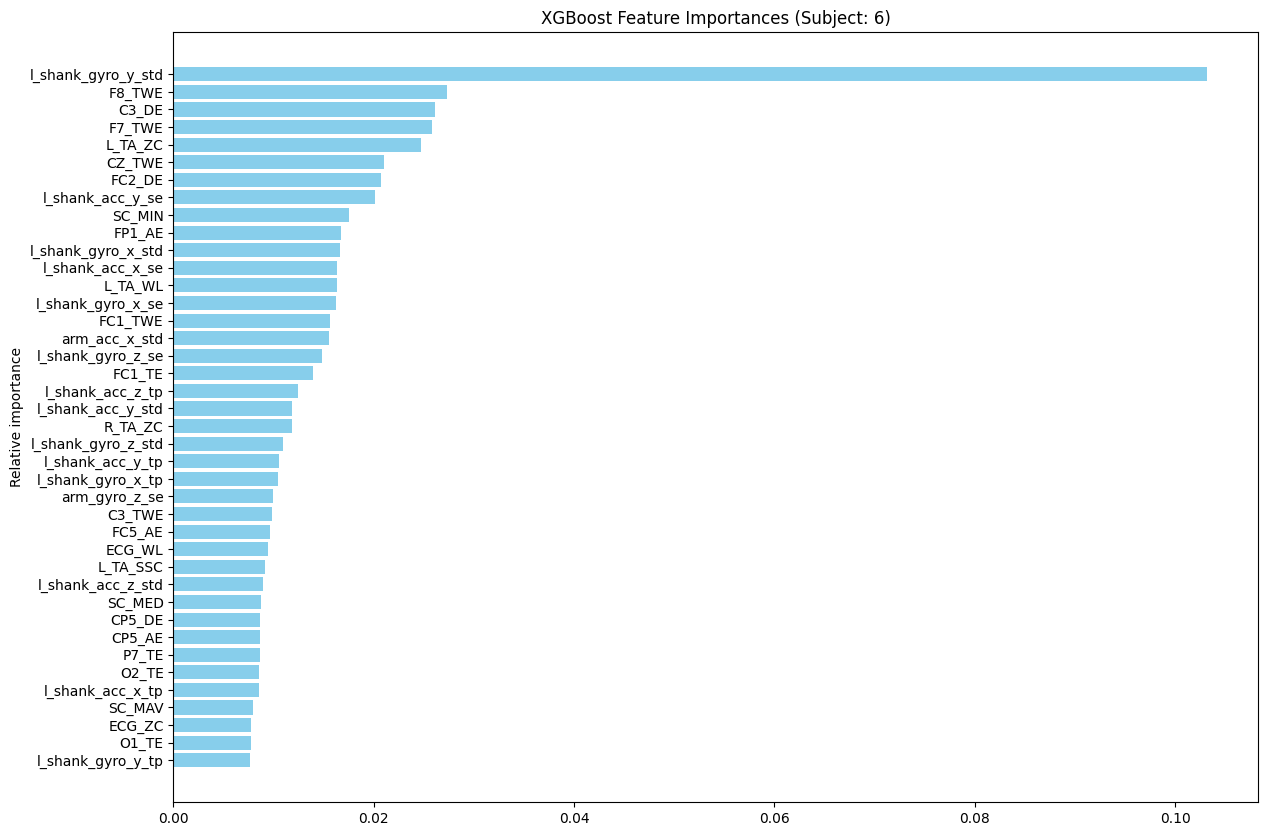

In [323]:
# Plot the feature importances

model_best_features_pd = pd.DataFrame({'XGBoost Features' : X_train.columns, 'Feature Importances' : model.feature_importances_})
model_best_features_pd = model_best_features_pd.sort_values(by = 'Feature Importances', ascending = True)[-40:]
plt.figure(figsize = (14, 10))
plt.barh(model_best_features_pd['XGBoost Features'], model_best_features_pd['Feature Importances'], color = 'skyblue')
plt.ylabel('Relative importance')
plt.title(f'XGBoost Feature Importances (Subject: {subject})');

In [305]:
# The most 40 important features
features_importances = pd.DataFrame({'Features' : X_train.columns, 'Important' : model.feature_importances_})
imp_40_feature_names = features_importances.sort_values(by = 'Important', ascending = False)[:40].Features.tolist()

# New features in train and test
X_train_imp = X_train[imp_40_feature_names]
X_test_imp = X_test[imp_40_feature_names]

oversampler = SMOTE()
X_resampled_imp, y_resampled = oversampler.fit_resample(X_train_imp, y_train)

In [306]:
# Classifier and predictions

n_replicas = 10
eeg_emg_sc_acc_performance_metrics_imp =[]

for i in range(n_replicas):
    model = XGBClassifier(**(best_params)) #SVC(C = 2, kernel = 'rbf')
    model.fit(X_resampled_imp, y_resampled)
    y_pred_imp = model.predict(X_test_imp)

    eeg_emg_sc_acc_accuracy_imp = accuracy_score(y_test, y_pred_imp)
    eeg_emg_sc_acc_sensitivity_imp = recall_score(y_test, y_pred_imp)
    eeg_emg_sc_acc_specificity_imp = recall_score(y_test, y_pred_imp, pos_label = 0)
    eeg_emg_sc_acc_precision_imp = precision_score(y_test, y_pred_imp)
    eeg_emg_sc_acc_f1_score_imp = f1_score(y_test, y_pred_imp)
    eeg_emg_sc_auc_imp = roc_auc_score(y_test, y_pred_imp)

    eeg_emg_sc_acc_performance_metrics_imp.append([eeg_emg_sc_acc_accuracy_imp, eeg_emg_sc_acc_sensitivity_imp, eeg_emg_sc_acc_specificity_imp,
                                    eeg_emg_sc_acc_precision_imp, eeg_emg_sc_acc_f1_score_imp, eeg_emg_sc_auc_imp])

eeg_emg_sc_acc_mean_metrics_imp = np.mean(eeg_emg_sc_acc_performance_metrics_imp, axis = 0)


print(eeg_emg_sc_acc_mean_metrics_imp)

[0.8685446  0.85915493 0.87323944 0.7721519  0.81333333 0.86619718]


### Ploting the results

In [309]:
metrics = [eeg_mean_metrics, emg_mean_metrics, sc_mean_metrics, acc_mean_metrics, eeg_emg_mean_metrics, eeg_sc_mean_metrics,
           eeg_acc_mean_metrics, emg_sc_mean_metrics, emg_acc_mean_metrics, sc_acc_mean_metrics, eeg_emg_sc_mean_metrics, 
           eeg_emg_acc_mean_metrics, eeg_sc_acc_mean_metrics, emg_sc_acc_mean_metrics, eeg_emg_sc_acc_mean_metrics, 
           eeg_emg_sc_acc_mean_metrics_imp]

combinations = ['EEG', 'EMG', 'SC', 'ACC', 'EEG + EMG', 'EEG + SC', 'EEG + ACC', 
                'EMG + SC', 'EMG + ACC', 'SC + ACC', 'EEG + EMG + SC', 'EEG + EMG + ACC', 
                'EEG + SC + ACC', 'EMG + SC + ACC', 'EEG + EMG + SC + ACC', 'Best 40 Features']

metric_names = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'AUC']

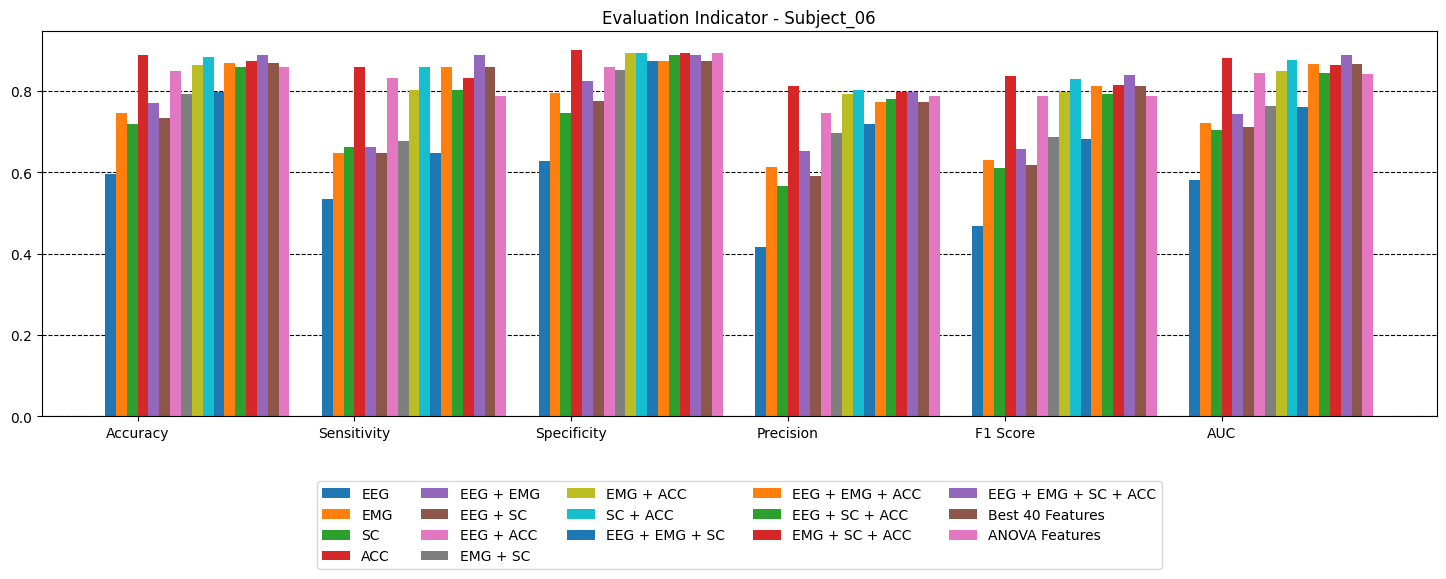

In [310]:
bar_width = 0.05

x = np.arange(len(metric_names))

fig, ax = plt.subplots(figsize = (18, 5))

for i, combo in enumerate(combinations):
    ax.bar(x + i * bar_width, metrics[i], label=combo, width=bar_width, zorder = 2)

ax.set_xticks(x + (len(metric_names) - 1) * bar_width / 2)
ax.set_xticklabels(metric_names)
ax.set_title(f'Evaluation Indicator - Subject_0{subject}')
ax.legend(loc='upper center', bbox_to_anchor = (0.5, -0.15), ncol = 5)
ax.grid(axis = 'y', color = 'black', linestyle = '--', zorder = 1)

plt.show()

### Saving the results

In [311]:
# Saving the results in a csv file
metrics_pd = pd.DataFrame(metrics, columns = metric_names, index = combinations)
metrics_pd.to_csv(f'Performance Metrics/Subject_0{subject}_Performance_Metrics.csv', index = True)